### Lab 7: Higgs Classification

In [1]:
import pickle
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("lab5/qcd_100000_pt_250_500.pkl",'rb') # signal dataset
qcd = pickle.load(infile)
infile = open ("lab5/higgs_100000_pt_250_500.pkl",'rb') # background dataset
higgs = pickle.load(infile)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


## 1) Make a stacked histogram plot for the feature variable: mass

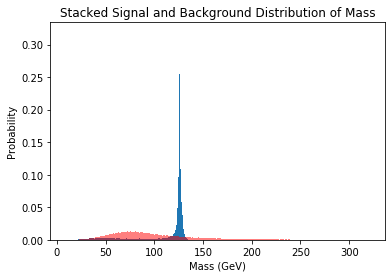

In [2]:
plt.hist(higgs['mass'], 500, density=True)
plt.hist(qcd['mass'], 500, color='red', alpha=.5, density=True)
plt.title('Stacked Signal and Background Distribution of Mass')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# a. Evaluate expected significance without any event selection

In [3]:
lenMass = len(qcd['mass'])
meanBG = np.mean(qcd['mass'])
prob = stats.poisson.cdf(125, meanBG) # x signal is eyeballed to 125
sigma = stats.norm.ppf(prob)
print('The signal of 125 is ', sigma, '\N{greek small letter sigma}')

lenSigMass = len(higgs['mass'])
NBG = 20000
NSig = 100
value = NSig / math.sqrt(NBG)
print('length of signal / square root of length of background = ', value)

The signal of 125 is  2.70499414329355 σ
length of signal / square root of length of background =  0.7071067811865475


## 2) Identify mass cuts to optimize the expected significance.

# a. Try different mass cuts systematically

Significance (Mass cuts 100-150):  1.180160975626716


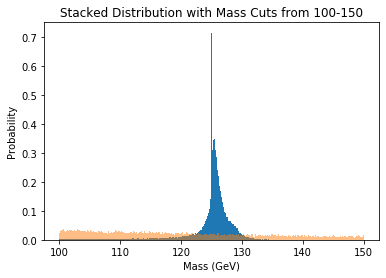

Significance (Mass cuts 110-140):  1.507680538089882


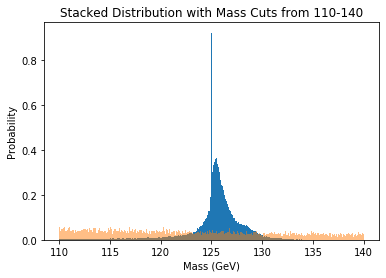

Significance (Mass cuts 120-130):  2.4225963501794676


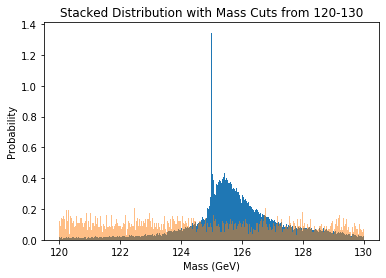

In [5]:
origArr1 = len(qcd['mass'])
origSig1 = len(qcd['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 150 and qcd['mass'][i] > 100):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 150 and higgs['mass'][i] > 100):
        newSig1.append(higgs['mass'][i])
print('Significance (Mass cuts 100-150): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 100-150')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 140 and qcd['mass'][i] > 110):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 140 and higgs['mass'][i] > 110):
        newSig1.append(higgs['mass'][i])
print('Significance (Mass cuts 110-140): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 110-140')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 130 and qcd['mass'][i] > 120):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 130 and higgs['mass'][i] > 120):
        newSig1.append(higgs['mass'][i])
print('Significance (Mass cuts 120-130): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# b. Evaluate expected significance for each set of mass cuts

Mass cut from 100-150:
Nhiggs = 8, Nqcd = 6378.51
significance = Nhiggs/sqrt(Nqcd) = 1.18

Mass cut from 110-140:
Nhiggs = 90.32, Nqcd = 3800.34
significance = Nhiggs/sqrt(Nqcd) = 1.51

Mass cut from 120-130:
Nhiggs = 83.01, Nqcd = 1250.81
significance = Nhiggs/sqrt(Nqcd) = 2.42

# c. Identify the set of the mass cuts which give you the highest significance.

The method with which I went about performing these mass cuts largely revolved around normalizing my dataset. I am working with the lowPT dataset and so my Nhiggs = 100 while my Nqcd = 20,000 and so my initial significance (Nhiggs/sqrt(Nqcd)) = .71. This is a pretty low significance compared to the expected significance of 2.70 we calculated without event selection and so I needed to perform mass cuts to eliminate as much background as I could to isolate the signal and get a higher signficance reading. To do this I took the 'total' number of values in 'qcd' so that I would have a value to normalize with. Then, I iterated through every value in 'qcd' and discovered which of them were within my accepted boundary of values for my mass cut (100-150, 110-140, and 120-130. I determined these mass cut values by looking at the graph and understanding that the signal data was around 125 so that I should cut around it. I systematially decreased the sensitivity by 20 each time I took a mass cut to observe the patterns that occur with it.) and put these values in a 'newNorm' list. Then I divided the number of values in 'newNorm' by the number of values in 'qcd', or 'total', to normalize the datasets to 1 so the bins of the histogram add up to 1. Finally I multiplied this value by 20,000 to normalize the dataset to 20,000 instead of 1. Then I repeated this process for Nhiggs but normalized to 100 instead.

I performed these processes to find the above listed significance values and found that the more sensitive testing of 120-130 gave me the highest signficance of 2.42 and this value was the closest to my expected value of 2.70.

## 3) Make stacked histogram plots for the rest of features

# a. Set A of plots without any event selection

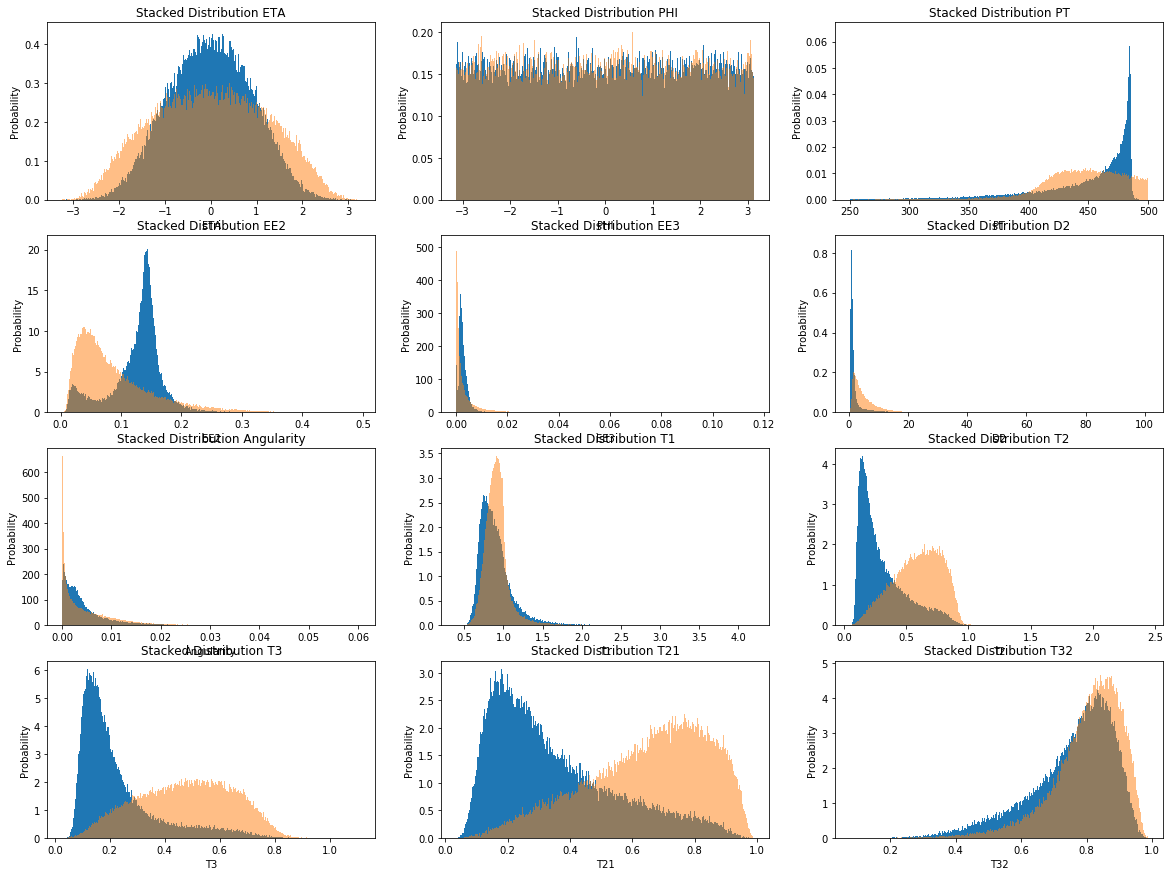

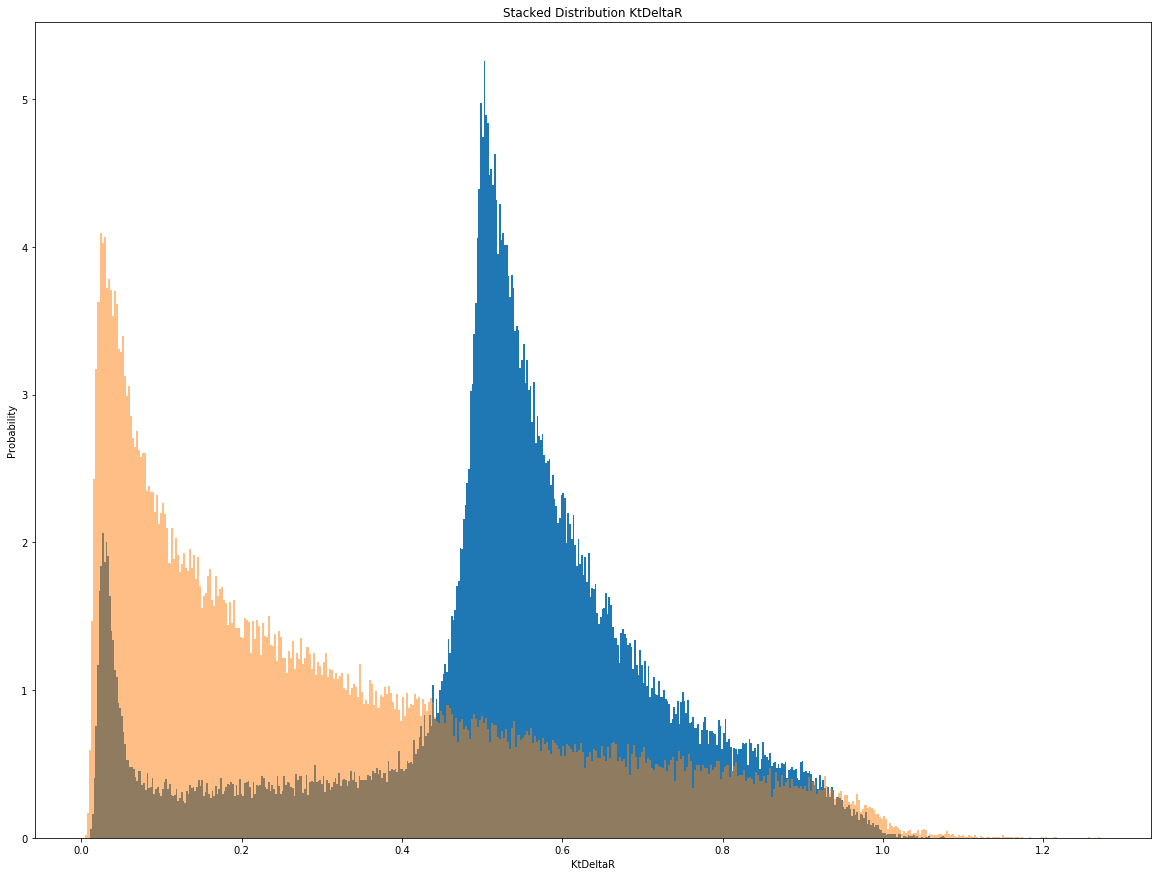

In [6]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(4, 3)
ax[0][0].hist(higgs['eta'], 500, density=True)
ax[0][0].hist(qcd['eta'], 500, density=True, alpha=.5)
ax[0][0].set_title('Stacked Distribution ETA')
ax[0][0].set_ylabel('Probability')
ax[0][0].set_xlabel('ETA')
ax[0][1].hist(higgs['phi'], 500, density=True)
ax[0][1].hist(qcd['phi'], 500, density=True, alpha=.5)
ax[0][1].set_title('Stacked Distribution PHI')
ax[0][1].set_ylabel('Probability')
ax[0][1].set_xlabel('PHI')
ax[0][2].hist(higgs['pt'], 500, density=True)
ax[0][2].hist(qcd['pt'], 500, density=True, alpha=.5)
ax[0][2].set_title('Stacked Distribution PT')
ax[0][2].set_ylabel('Probability')
ax[0][2].set_xlabel('PT')

ax[1][0].hist(higgs['ee2'], 500, density=True)
ax[1][0].hist(qcd['ee2'], 500, density=True, alpha=.5)
ax[1][0].set_title('Stacked Distribution EE2')
ax[1][0].set_ylabel('Probability')
ax[1][0].set_xlabel('EE2')
ax[1][1].hist(higgs['ee3'], 500, density=True)
ax[1][1].hist(qcd['ee3'], 500, density=True, alpha=.5)
ax[1][1].set_title('Stacked Distribution EE3')
ax[1][1].set_ylabel('Probability')
ax[1][1].set_xlabel('EE3')
ax[1][2].hist(higgs['d2'], 500, density=True)
ax[1][2].hist(qcd['d2'], 500, density=True, alpha=.5)
ax[1][2].set_title('Stacked Distribution D2')
ax[1][2].set_ylabel('Probability')
ax[1][2].set_xlabel('D2')

ax[2][0].hist(higgs['angularity'], 500, density=True)
ax[2][0].hist(qcd['angularity'], 500, density=True, alpha=.5)
ax[2][0].set_title('Stacked Distribution Angularity')
ax[2][0].set_ylabel('Probability')
ax[2][0].set_xlabel('Angularity')
ax[2][1].hist(higgs['t1'], 500, density=True)
ax[2][1].hist(qcd['t1'], 500, density=True, alpha=.5)
ax[2][1].set_title('Stacked Distribution T1')
ax[2][1].set_ylabel('Probability')
ax[2][1].set_xlabel('T1')
ax[2][2].hist(higgs['t2'], 500, density=True)
ax[2][2].hist(qcd['t2'], 500, density=True, alpha=.5)
ax[2][2].set_title('Stacked Distribution T2')
ax[2][2].set_ylabel('Probability')
ax[2][2].set_xlabel('T2')

ax[3][0].hist(higgs['t3'], 500, density=True)
ax[3][0].hist(qcd['t3'], 500, density=True, alpha=.5)
ax[3][0].set_title('Stacked Distribution T3')
ax[3][0].set_ylabel('Probability')
ax[3][0].set_xlabel('T3')
ax[3][1].hist(higgs['t21'], 500, density=True)
ax[3][1].hist(qcd['t21'], 500, density=True, alpha=.5)
ax[3][1].set_title('Stacked Distribution T21')
ax[3][1].set_ylabel('Probability')
ax[3][1].set_xlabel('T21')
ax[3][2].hist(higgs['t32'], 500, density=True)
ax[3][2].hist(qcd['t32'], 500, density=True, alpha=.5)
ax[3][2].set_title('Stacked Distribution T32')
ax[3][2].set_ylabel('Probability')
ax[3][2].set_xlabel('T32')
plt.show()

plt.hist(higgs['KtDeltaR'], 500, density=True)
plt.hist(qcd['KtDeltaR'], 500, density=True, alpha=.5)
plt.title('Stacked Distribution KtDeltaR')
plt.ylabel('Probability')
plt.xlabel('KtDeltaR')
plt.show()

This part was similar to my lab 5 where I plotted every features' signal and background data. I am assuming we do this to get a general understanding of which features are more discriminatory (larger separation of background and signal) which we will use later to optimize mass cuts. I am noting that D2 and EE3 look most similar to the graph of mass with a high peak which is why I believe they will have the highest discrimination between background and signal.

Significance D2 with cuts:  1.7502571323589478


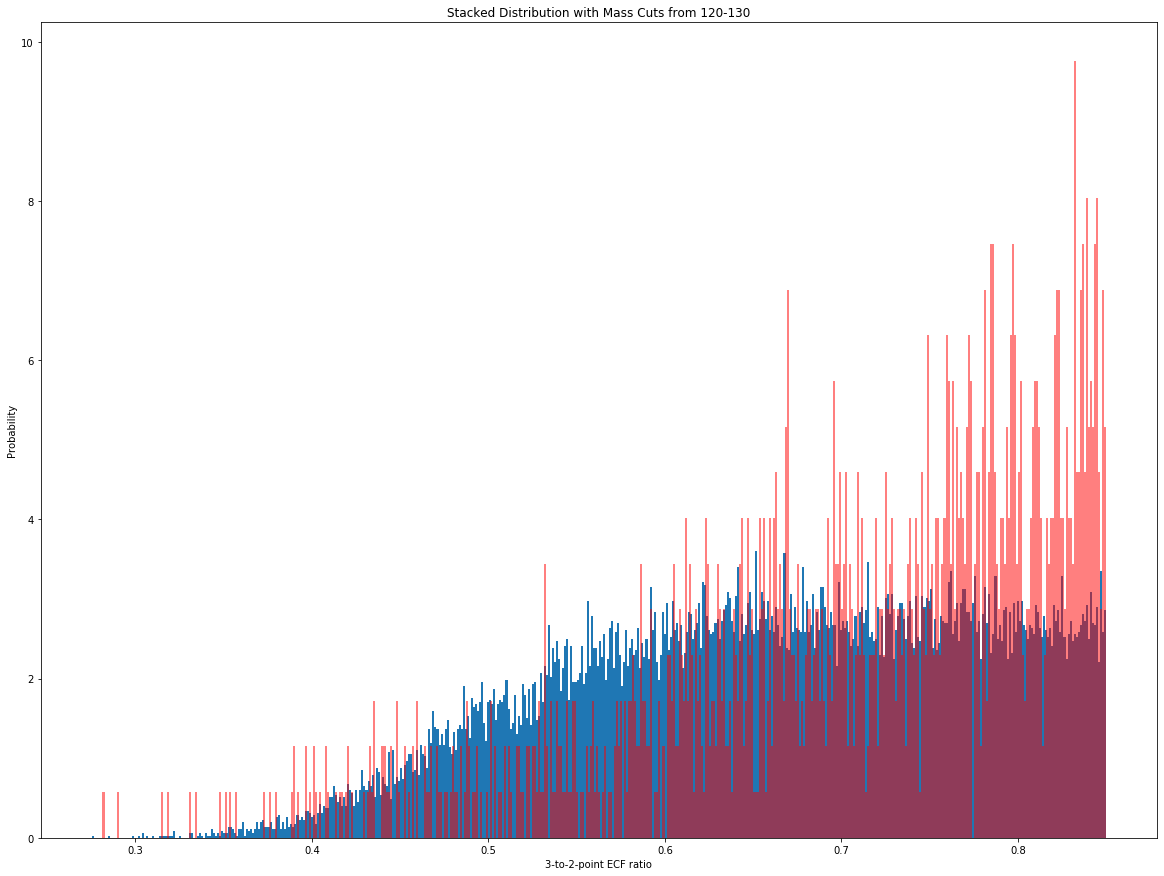

Significance EE3 with cuts:  0.7891396175621561


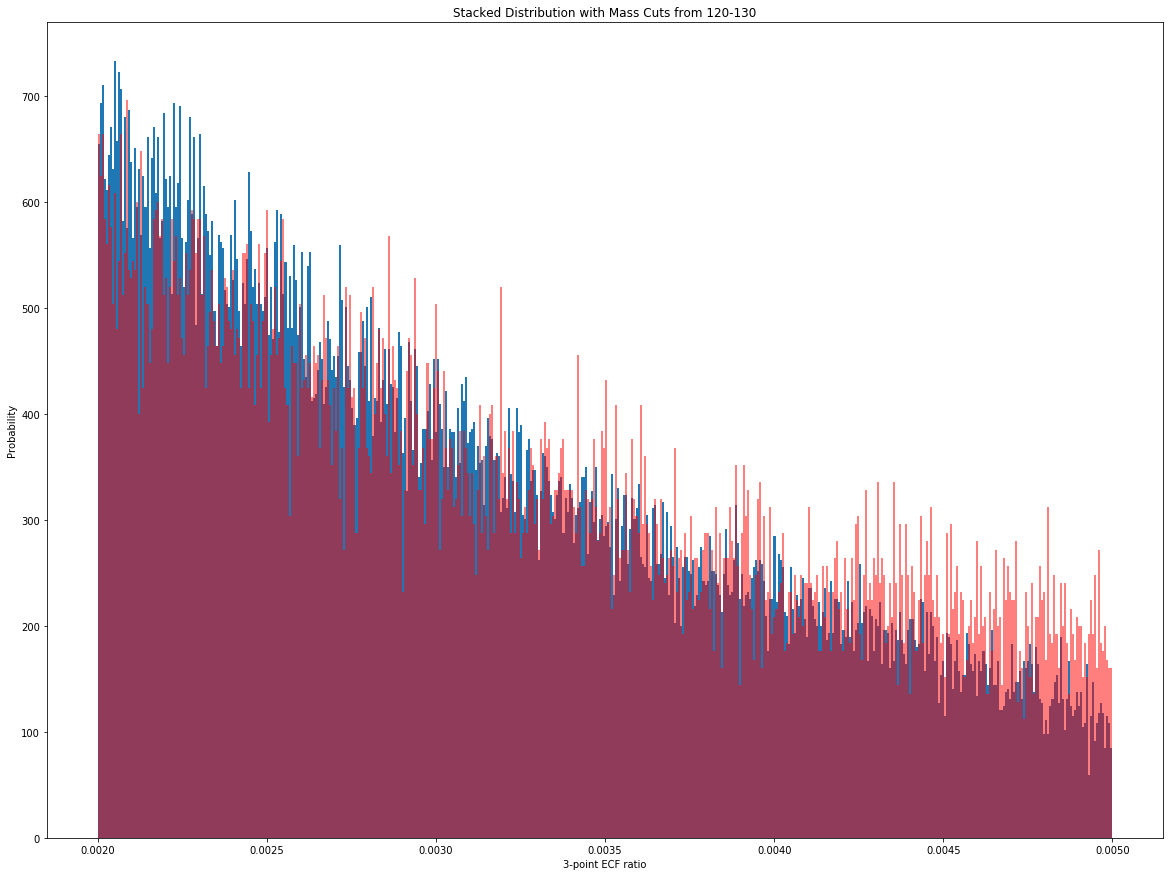

In [8]:
word = 'd2'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .85 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .85 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print('Significance D2 with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-to-2-point ECF ratio')
plt.ylabel('Probability')
plt.show()

word = 'ee3'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .005 and qcd[word][i] > .002):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .005 and higgs[word][i] > .002):
        newSig1.append(higgs[word][i])
print('Significance EE3 with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-point ECF ratio')
plt.ylabel('Probability')
plt.show()

At first glance it seemed that 3-to-2-point ECF ratio and 3-point ECF ratio are highly discriminant features because the strong distinction between the background and signal data. Thus, I will take cuts of the data to try and prove that these features are the most discriminant. Interestingly we find that the signficance of the 3-to-2-point ECF ratio is 1.75 and the signficance of the 3-point ECF ratio is .79 which is not anywhere near the signficance of the mass which is at 2.42. Thus I am concluding that none of the other features are as discriminative as the mass feature. However, I will note 3-to-2-point ECF ratio has a strong discriminatory power which I may used in later parts where we take mass cuts.

Significance T21 with cuts:  1.5025036743498927


Significance KtDeltaR with cuts:  1.0571662900890928


Significance EE2 with cuts:  1.5520338918354906


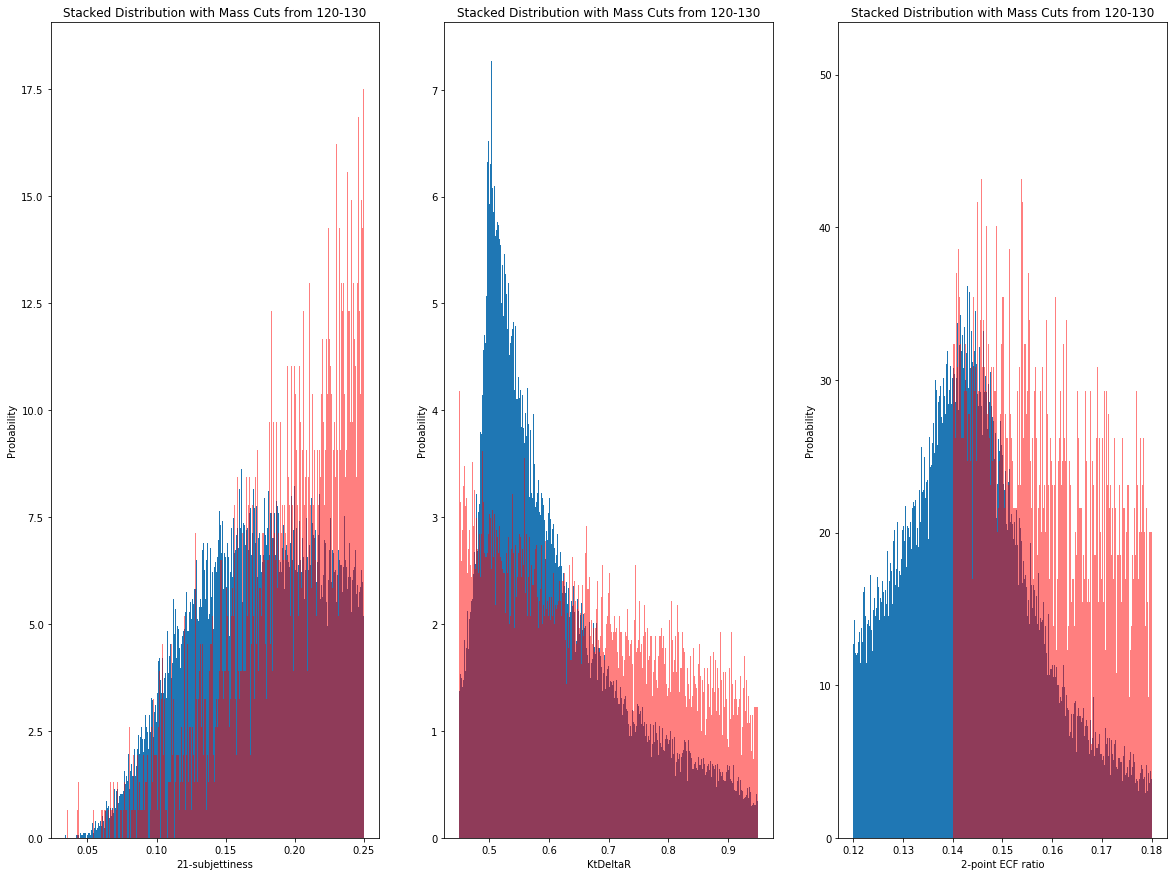

Significance T2 with cuts:  1.676316948048076


Significance T3 with cuts:  1.6893338973891063


Significance Pt with cuts:  0.5682466449540785


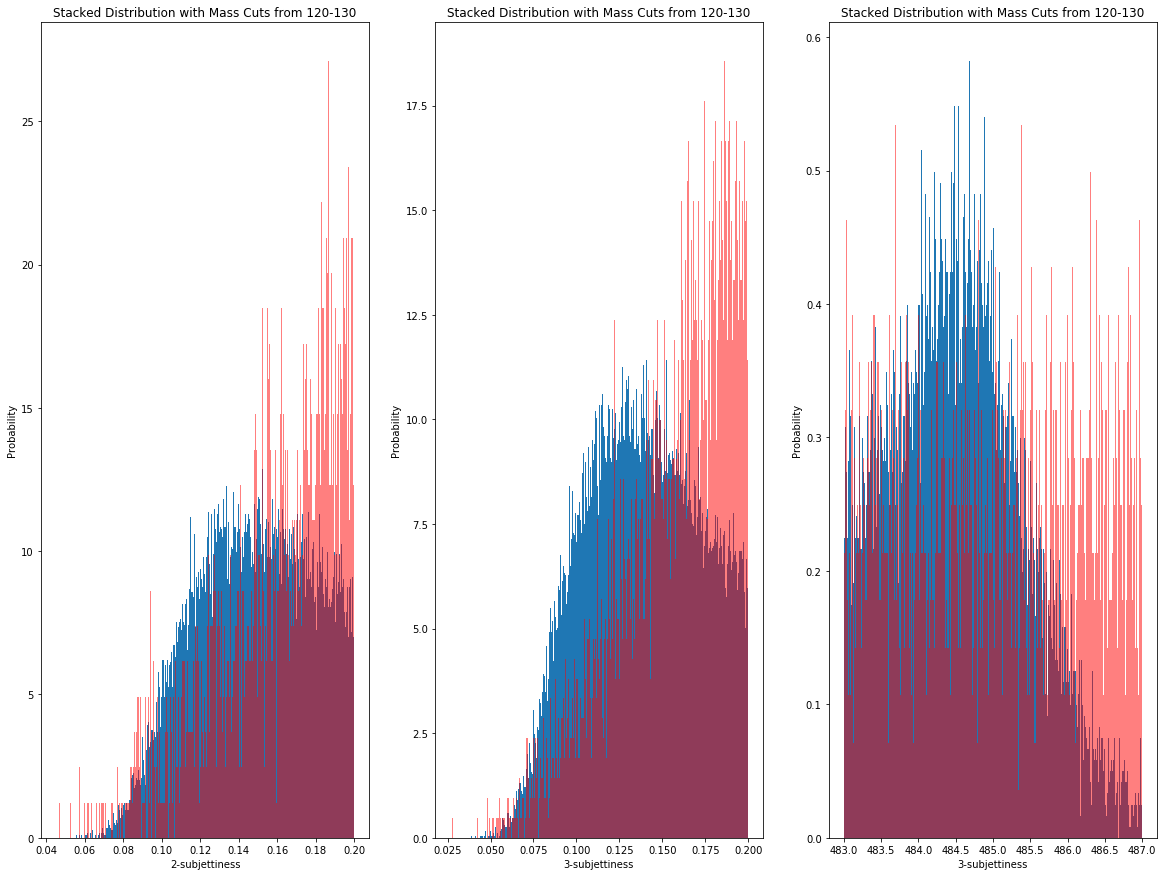

In [9]:
fig, ax = plt.subplots(1, 3)

word = 't21'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .25 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .25 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print('Significance T21 with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[0].hist(newSig1, 500, density=True)
ax[0].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[0].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[0].set_xlabel('21-subjettiness')
ax[0].set_ylabel('Probability')

word = 'KtDeltaR'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .95 and qcd[word][i] > 0.45):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .95 and higgs[word][i] > 0.45):
        newSig1.append(higgs[word][i])
print('Significance KtDeltaR with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[1].hist(newSig1, 500, density=True)
ax[1].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[1].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[1].set_xlabel('KtDeltaR')
ax[1].set_ylabel('Probability')

word = 'ee2'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .18 and qcd[word][i] > .14):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .18 and higgs[word][i] > .12):
        newSig1.append(higgs[word][i])
print('Significance EE2 with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[2].hist(newSig1, 500, density=True)
ax[2].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[2].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[2].set_xlabel('2-point ECF ratio')
ax[2].set_ylabel('Probability')
plt.show()

fig, ax = plt.subplots(1, 3)
word = 't2'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .2 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .2 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print('Significance T2 with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[0].hist(newSig1, 500, density=True)
ax[0].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[0].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[0].set_xlabel('2-subjettiness')
ax[0].set_ylabel('Probability')

word = 't3'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .2 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .2 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print('Significance T3 with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[1].hist(newSig1, 500, density=True)
ax[1].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[1].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[1].set_xlabel('3-subjettiness')
ax[1].set_ylabel('Probability')

word = 'pt'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < 487 and qcd[word][i] > 483):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < 487 and higgs[word][i] > 483):
        newSig1.append(higgs[word][i])
print('Significance Pt with cuts: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[2].hist(newSig1, 500, density=True)
ax[2].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[2].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[2].set_xlabel('3-subjettiness')
ax[2].set_ylabel('Probability')
plt.show()

In this part I plotted all of the features who I believed would yield good significance after cuts (good discriminance) which I determined by seeing if a lot of the background coincided with the signal. These features were 2-subjettines, 3-subjettines, KtDeltaR, 21-subjettiness, 3-2-point ECF ratio, as well as 2-point ECF ratio and all of these features yielded a signficance greater than 1. However, some of these were more discriminatory than other and the highly discriminatory datasets were t2, t3, t21, and ee2. Thus I will be making mass cuts to only these plots as well as to D2 because we can expect that maximizing signficance by taking mass cuts of all other plots will be very minimal and the significance from mass cuts can be maximized by cutting from more discriminatory plots such as the ones I have chosen. Additionally, from here I decided that D2 and T2 have the most discrimination so I am going to do optimal mass cuts for D2 and T2, then optimize significance by cutting from D2, and finally further optimize by cutting from T2.

# b. Set B of plots with your optimal mass cuts

Significance Mass (After cuts):  2.4225963501794676


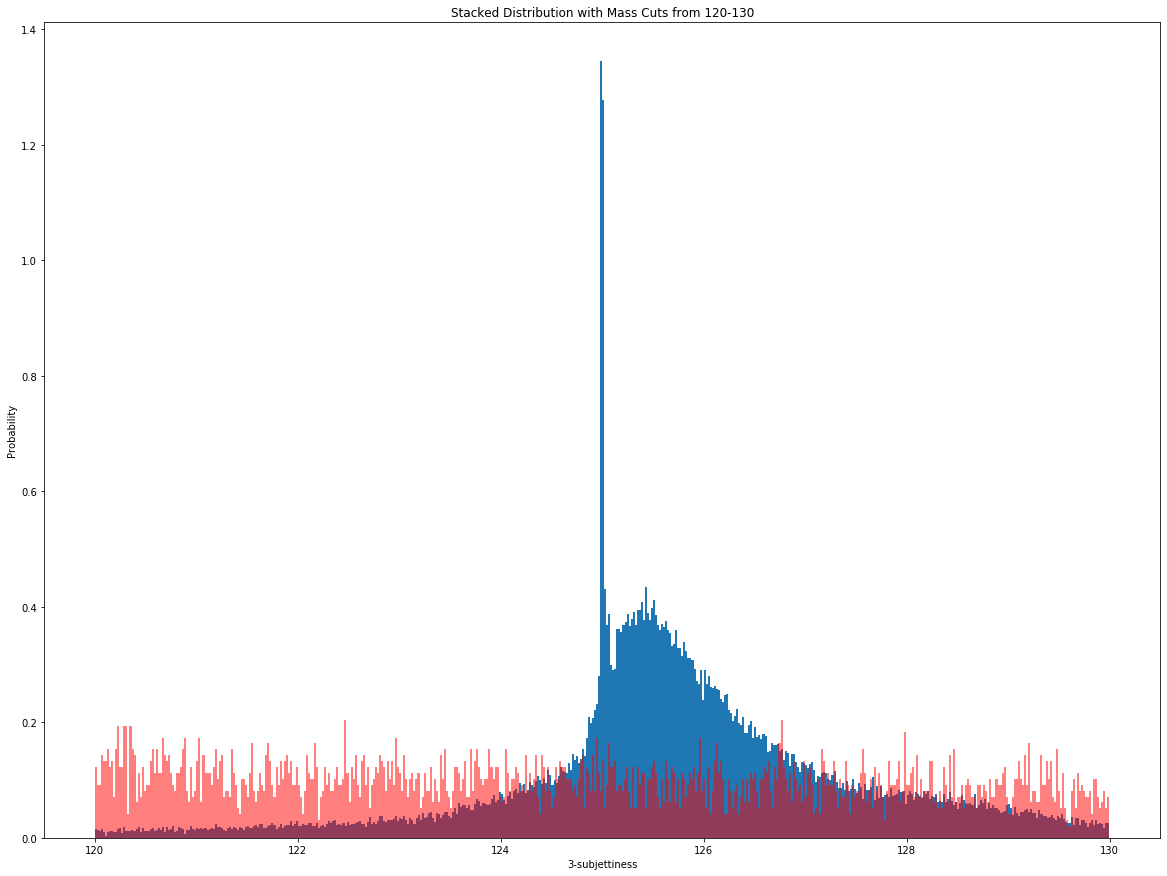

Significance D2:  2.4225963501794676


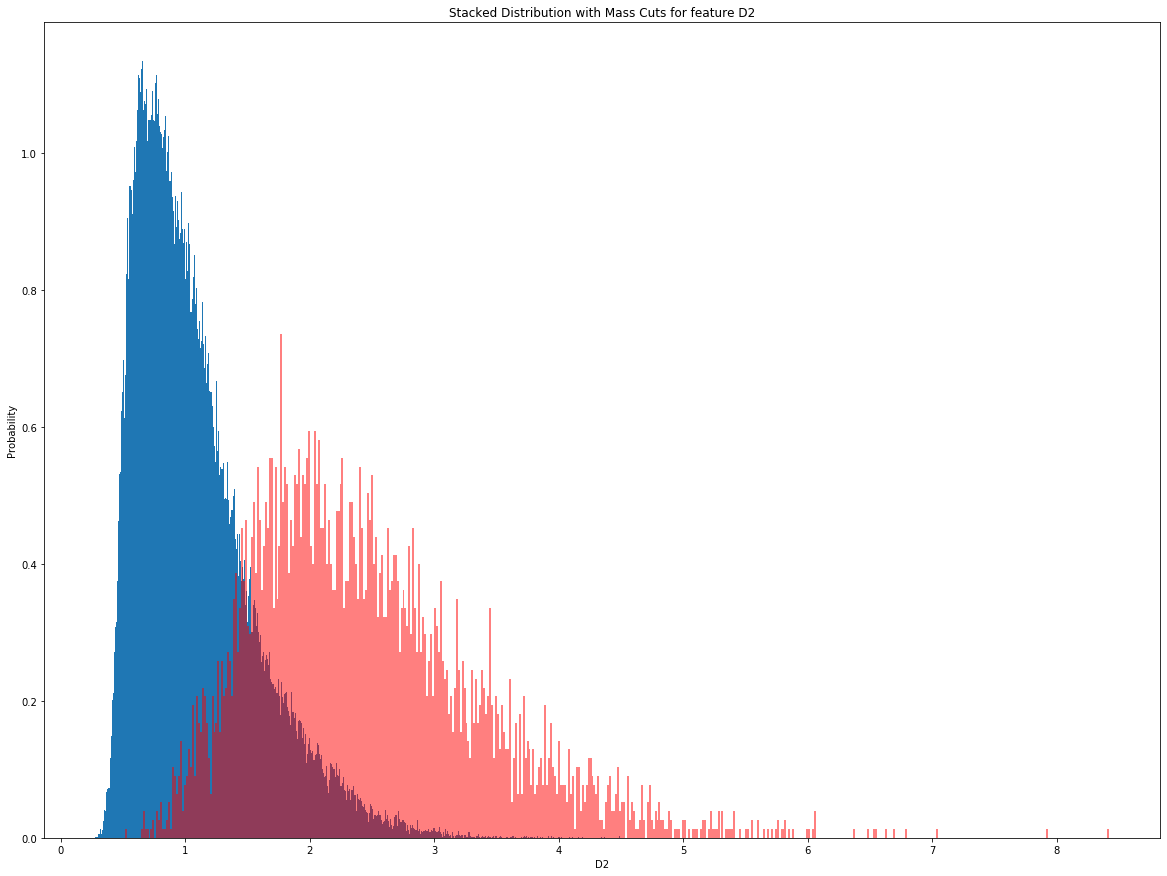

Significance EE3:  2.4225963501794676


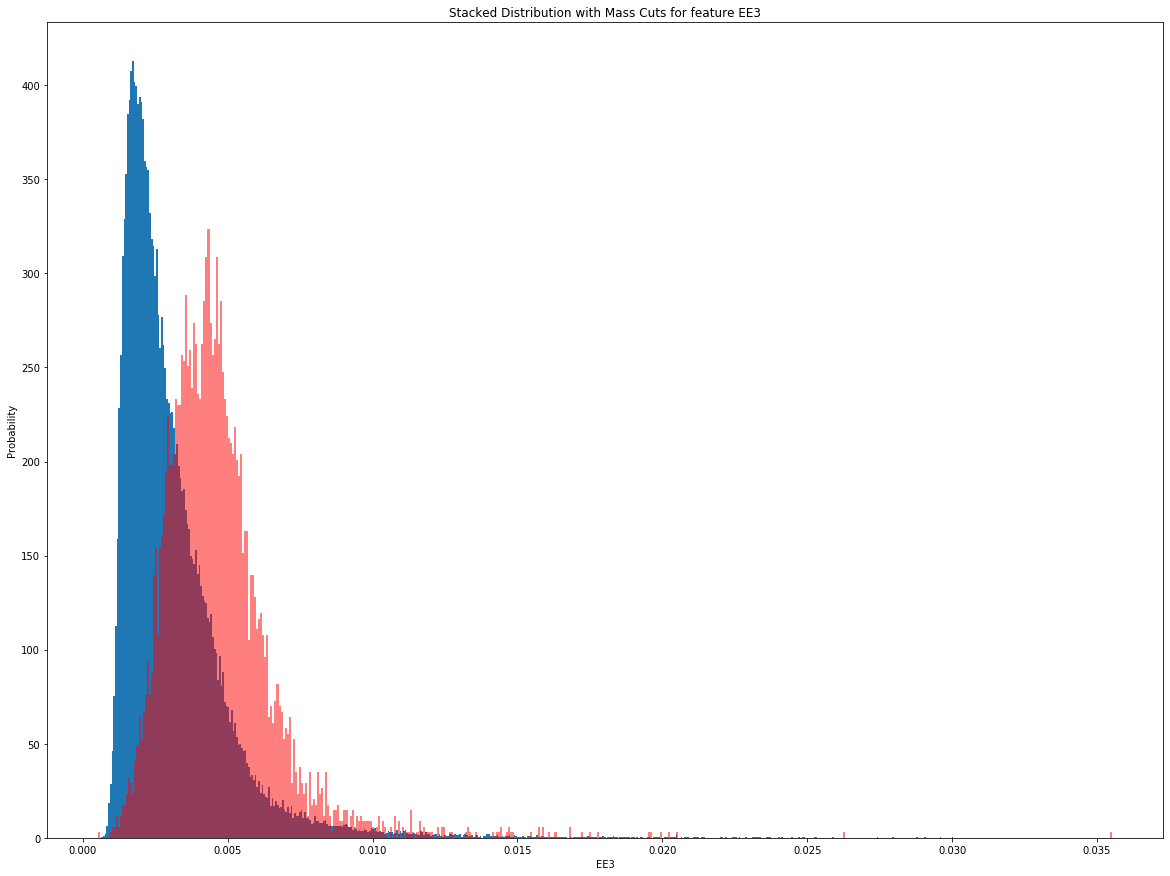

Significance T21:  2.4225963501794676


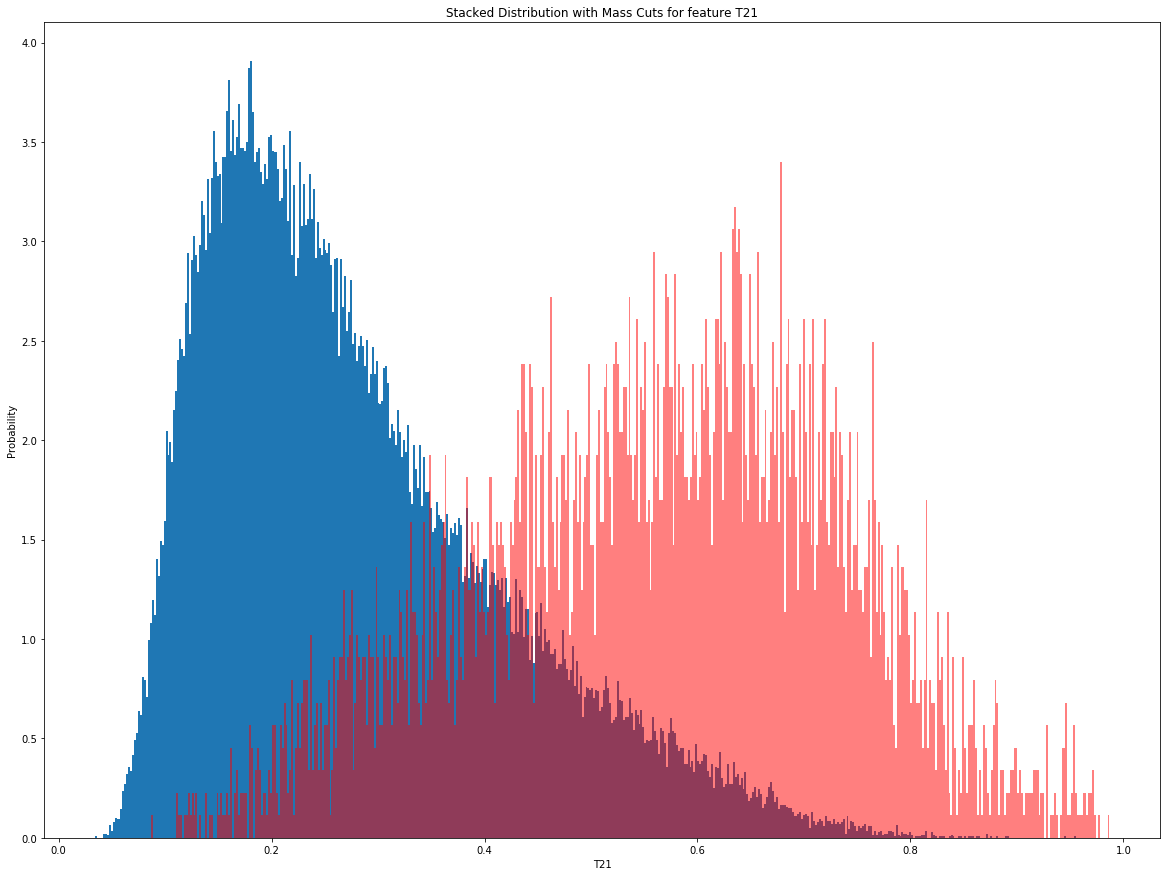

Significance EE2:  2.4225963501794676


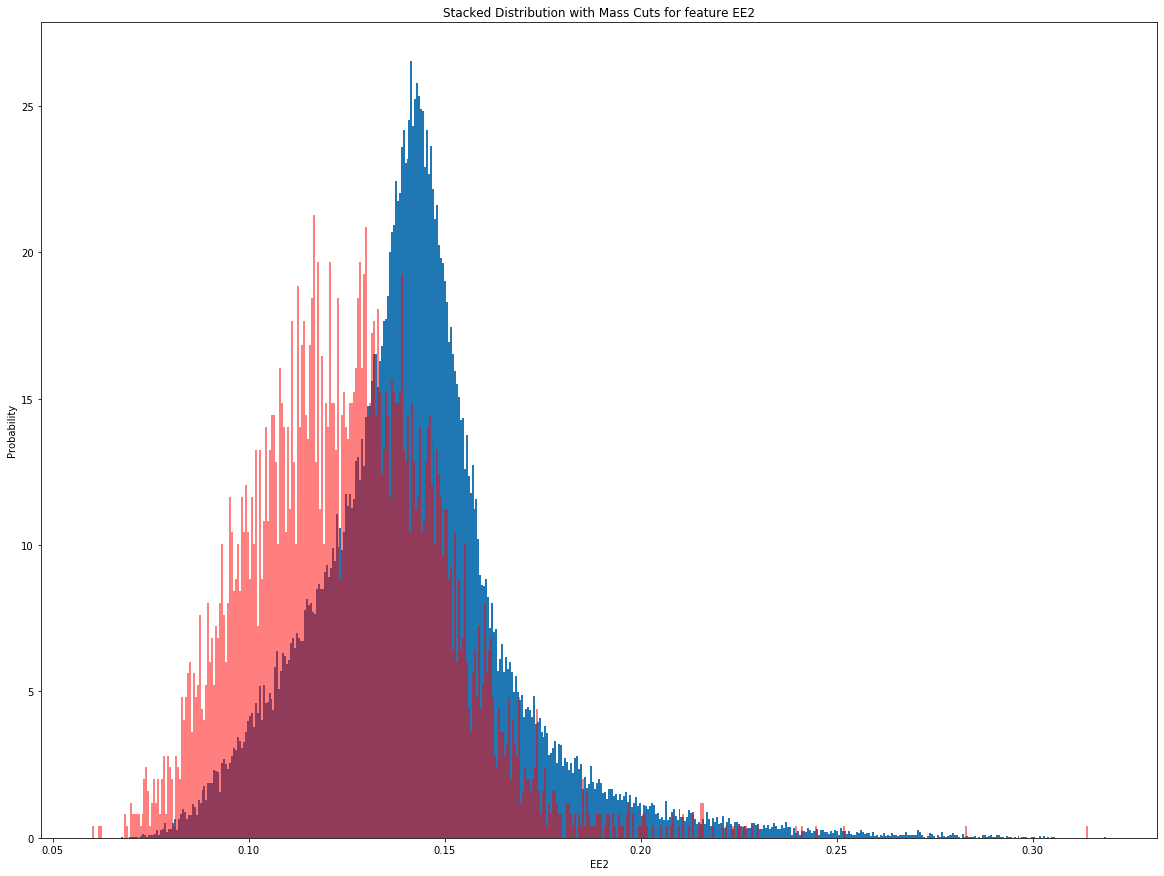

Significance T2:  2.4225963501794676


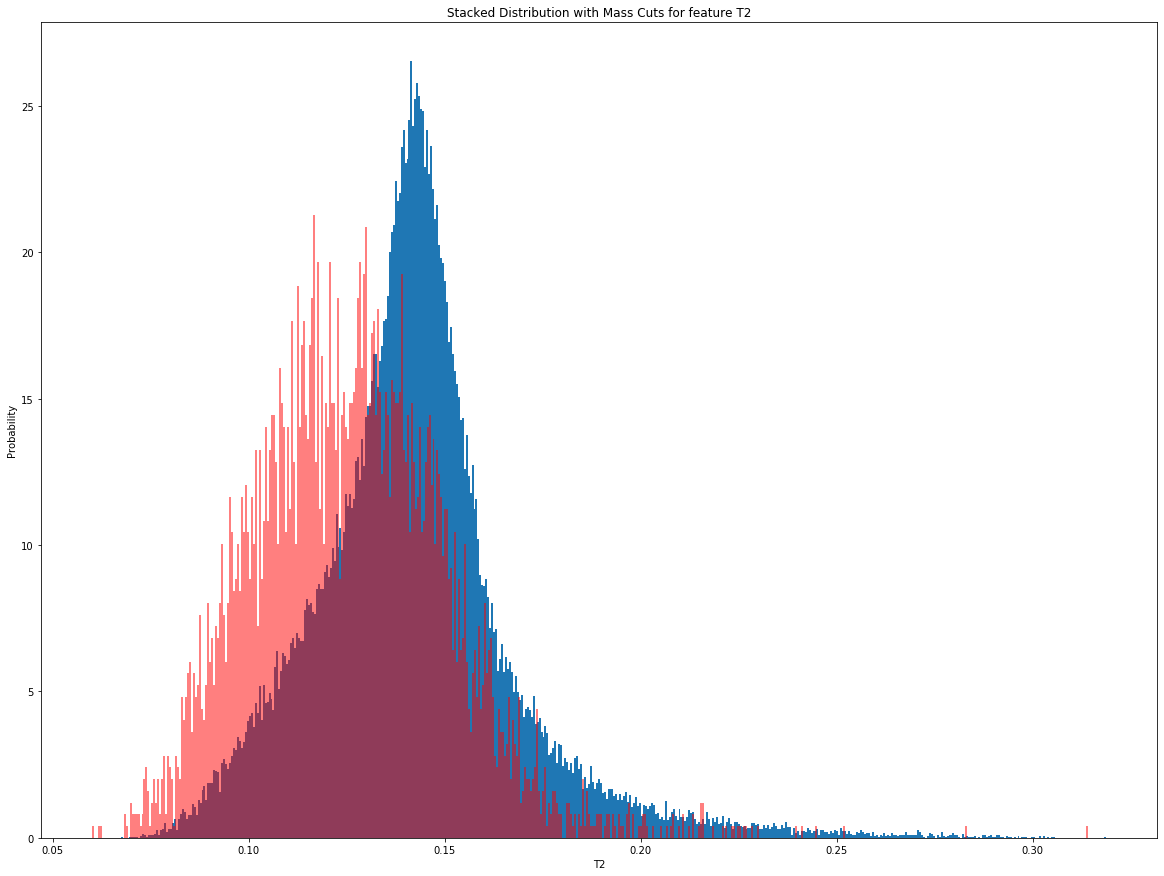

Significance T3:  2.4225963501794676


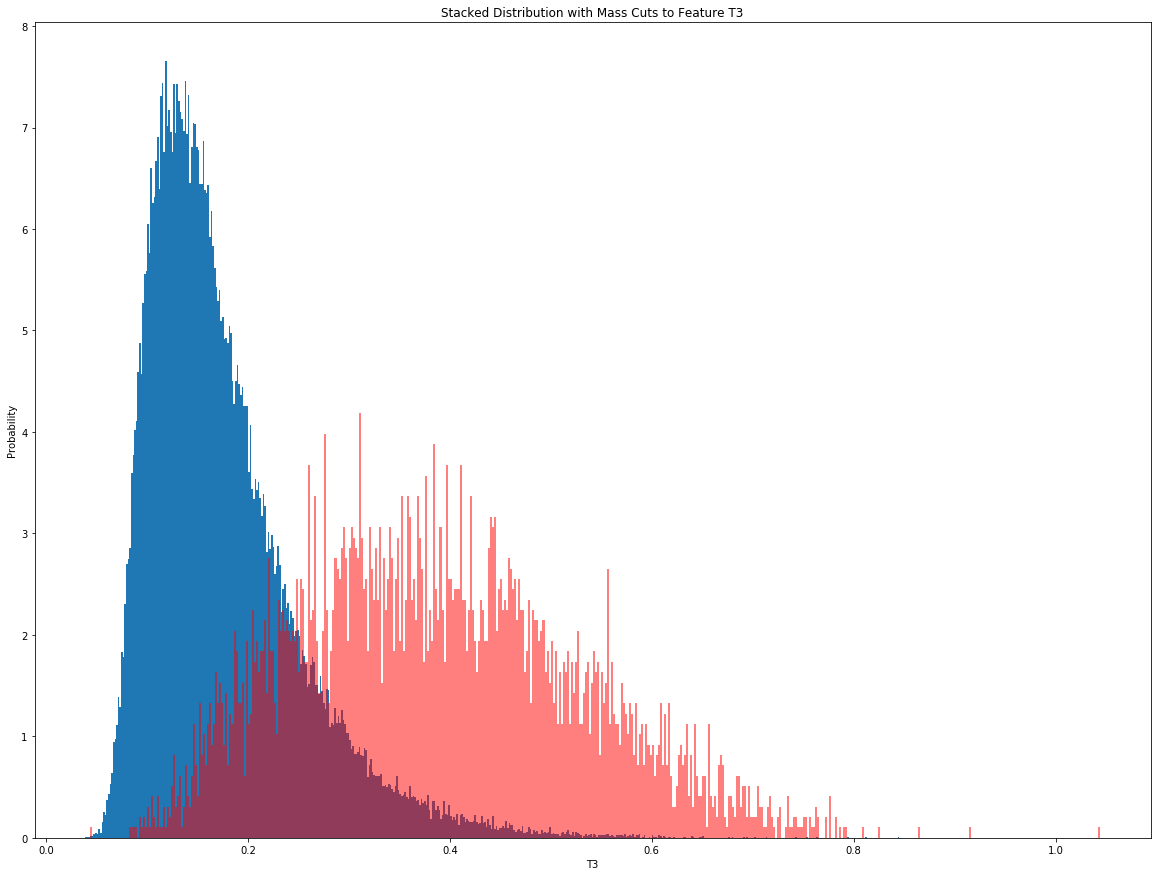

In [13]:
origArr1 = len(qcd['mass'])
origSig1 = len(qcd['mass'])

word = 'mass'
newArr1Mass = []
newSig1Mass = []
arr1Ind = []
sig1Ind = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < 130 and qcd[word][i] > 120):
        newArr1Mass.append(qcd[word][i])
        arr1Ind.append(i)
    if(higgs[word][i] < 130 and higgs[word][i] > 120):
        newSig1Mass.append(higgs[word][i])
        sig1Ind.append(i)
print('Significance Mass (After cuts): ', (100 * (len(newSig1Mass) / origSig1)) / (20000 * (len(newArr1Mass) / origArr1))**.5)
plt.hist(newSig1Mass, 500, density=True)
plt.hist(newArr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['d2'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['d2'][i])

print('Significance D2: ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassSigD2, 500, density=True)
plt.hist(arr1MassD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts for feature D2')
plt.xlabel('D2')
plt.ylabel('Probability')
# plt.yscale('log')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['ee3'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['ee3'][i])

print('Significance EE3: ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1MassSig, 500, density=True)
plt.hist(arr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts for feature EE3')
plt.xlabel('EE3')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['t21'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['t21'][i])

print('Significance T21: ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1MassSig, 500, density=True)
plt.hist(arr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts for feature T21')
plt.xlabel('T21')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['ee2'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['ee2'][i])

print('Significance EE2: ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1MassSig, 500, density=True)
plt.hist(arr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts for feature EE2')
plt.xlabel('EE2')
plt.ylabel('Probability')
plt.show()

#############################

arr1MassT2 = []
arr1MassSigT2 = []
for i in arr1Ind:
    arr1MassT2.append(qcd['t2'][i])
for i in sig1Ind:
    arr1MassSigT2.append(higgs['t2'][i])

print('Significance T2: ', (100 * (len(arr1MassSigT2) / origSig1)) / (20000 * (len(arr1MassT2) / origArr1))**.5)

plt.hist(arr1MassSig, 500, density=True)
plt.hist(arr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts for feature T2')
plt.xlabel('T2')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['t3'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['t3'][i])

print('Significance T3: ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1MassSig, 500, density=True)
plt.hist(arr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts to Feature T3')
plt.xlabel('T3')
plt.ylabel('Probability')
plt.show()

Here I took mass cuts of all of the features I think were significantly discriminatory such as t2, t3, t21, d2, and ee2. I will be making these mass cuts by first collecting all of the indices of 'mass' whose values fall within the mass cut range 120-130 we set when making cuts. Then for each feature I will record the values that correspond to the same indices recorded from the mass cuts because the datasets are recorded at the same time for any given index. I will then print the signal and background values collected by cutting from the features to observe qualitatively where we could cut to further increase signficance.

## 4) Optimize event selections using multiple features (if necessary)

As mentioned before, the 2-subjettines, 3-subjettines, KtDeltaR, 21-subjettiness, as well as 2-point ECF ratio features all yielded a signficance greater than 1 however the features that are most impactful to the significance of the dataset is 3-to-2-point ECF ratio as well as mass. 3-to-2-point ECF ratio has a signficance of 1.75 while the mass feature had a significance of 2.42 which has a much higher signficance than the other features listed previously that averaged a signficance of around 1.25.

# a. Find a set of feature cuts which can help you to achieve the best significance.

Significance after mass cuts D2:  2.4225963501794676
Significance after optimizing cut to D2:  3.804394193544661


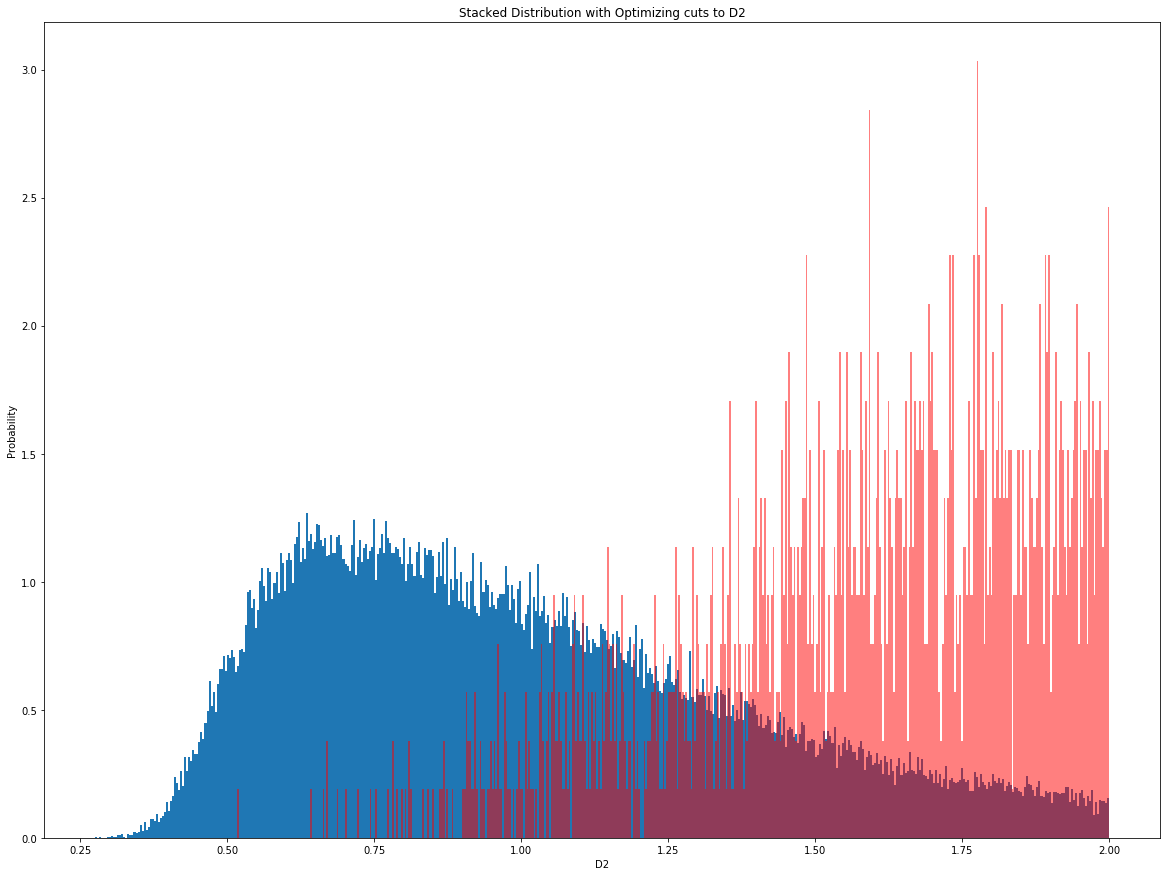

Significance of mass after cut is applied to mass:  3.804394193544661


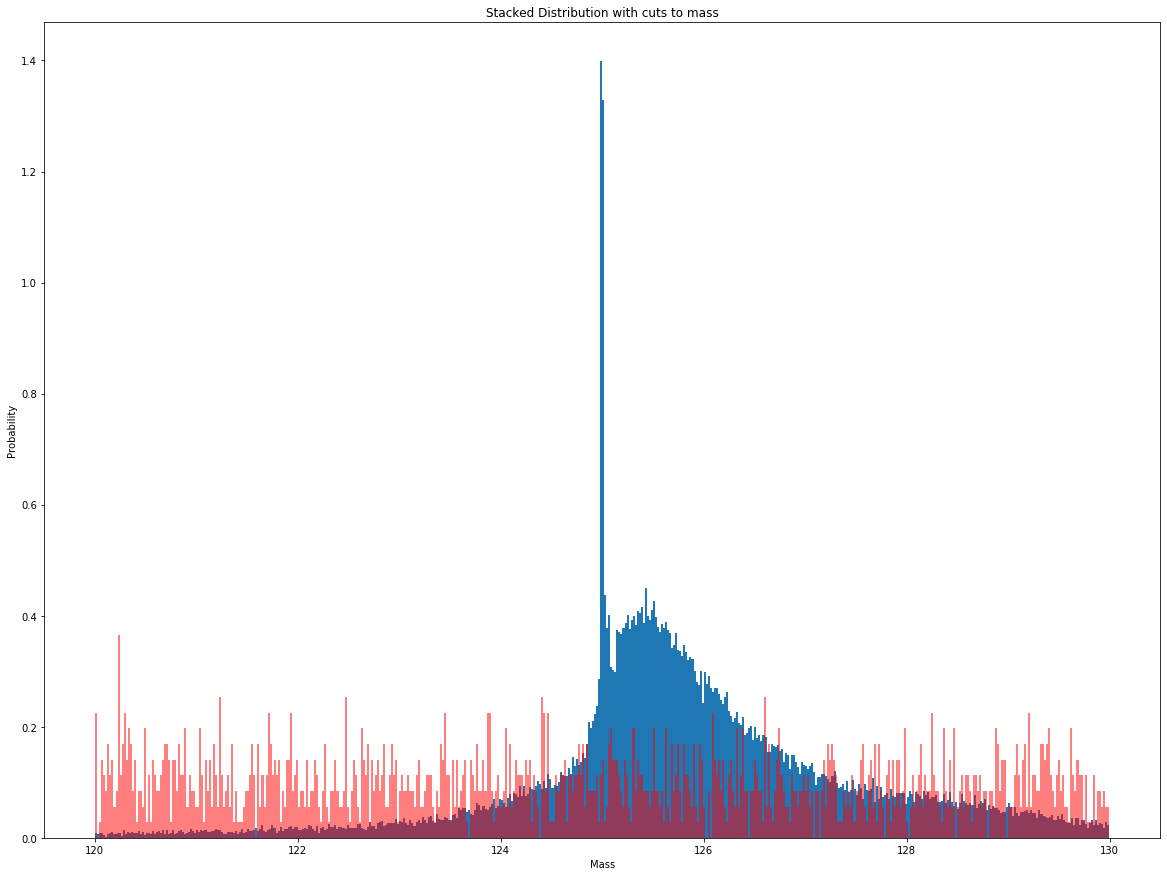

Significance of T2 after cut is applied to T2:  3.804394193544661


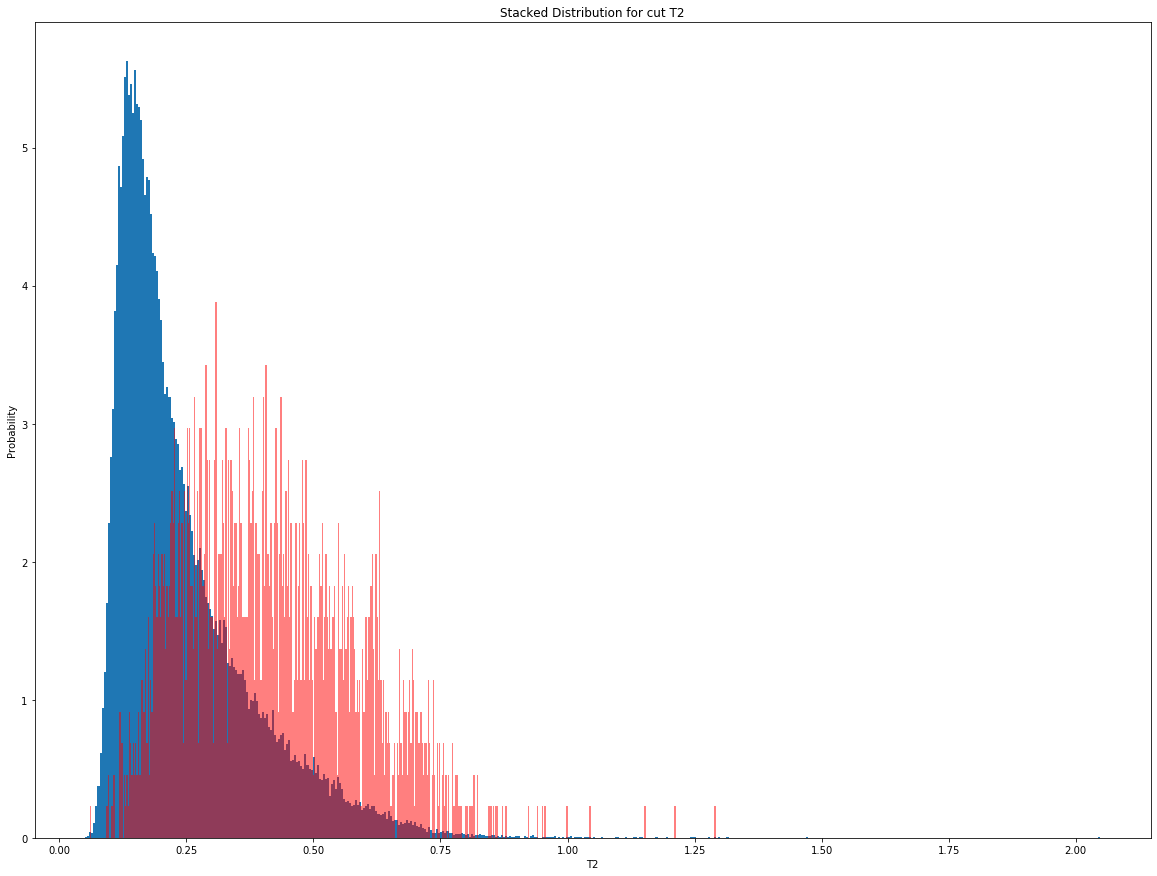

Significance of T2 after optimizing cuts are applied:  4.838748789011665


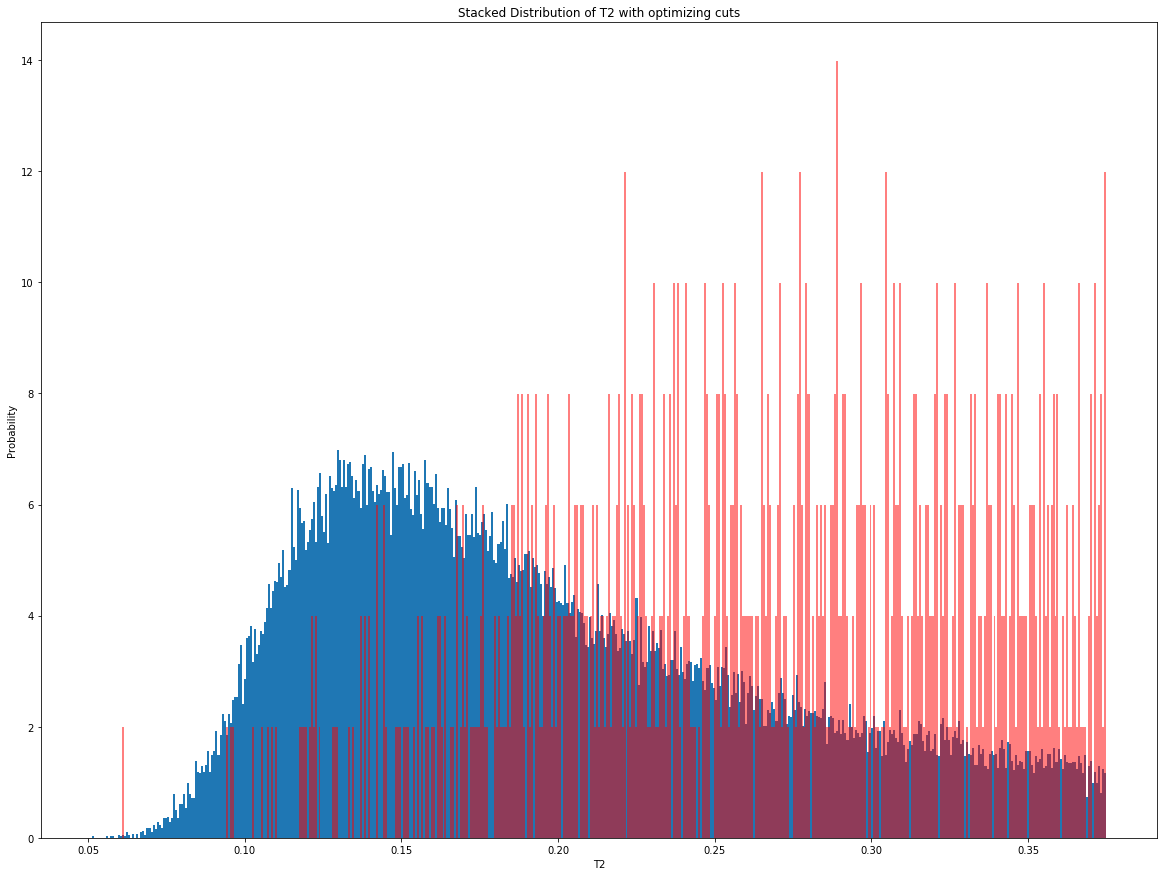

Significance of D2 after cut is applied to D2:  4.838748789011665


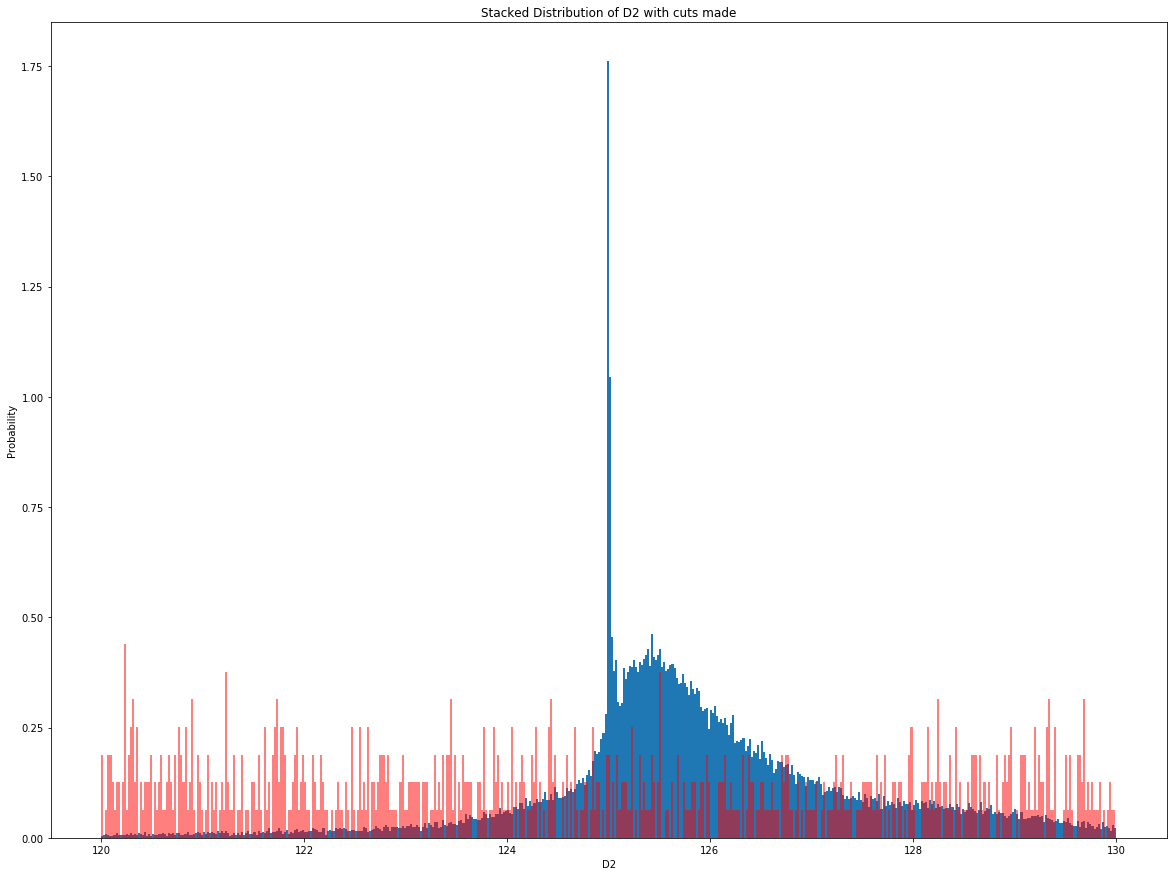

Significance of mass after cut is applied to mass:  4.838748789011665


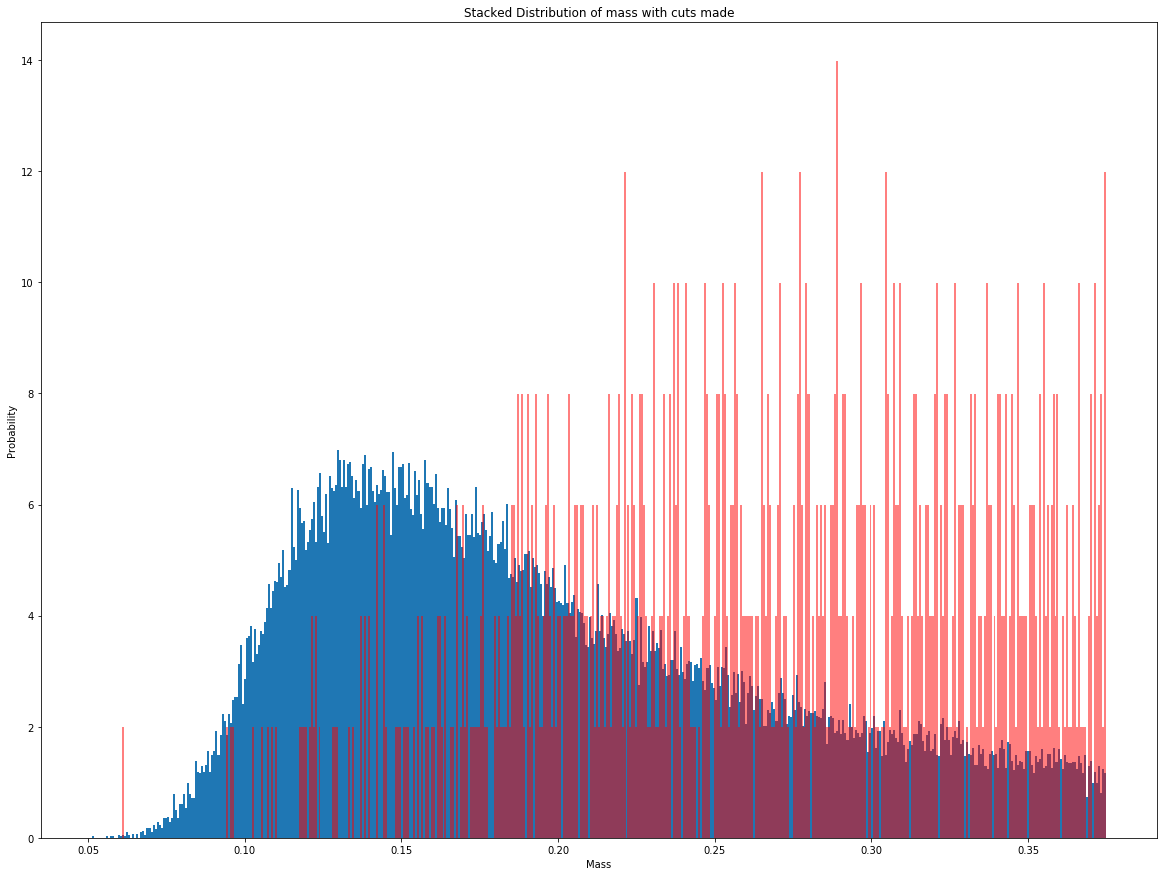

In [14]:
print('Significance after mass cuts D2: ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)
newArr1D2 = []
newSig1D2 = []
arr1Ind = []
sig1Ind = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < 2 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < 2 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind.append(i)
print('Significance after optimizing cut to D2: ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Optimizing cuts to D2')
plt.xlabel('D2')
plt.ylabel('Probability')
plt.show()

arr1MassFirst = []
arr1MassSigFirst = []
for i in arr1Ind:
    arr1MassFirst.append(newArr1Mass[i])
for i in sig1Ind:
    arr1MassSigFirst.append(newSig1Mass[i])

print('Significance of mass after cut is applied to mass: ', (100 * (len(arr1MassSigFirst) / origSig1)) / (20000 * (len(arr1MassFirst) / origArr1))**.5)

plt.hist(arr1MassSigFirst, 500, density=True)
plt.hist(arr1MassFirst, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with cuts to mass')
plt.xlabel('Mass')
plt.ylabel('Probability')
plt.show()

arr1MassSecond = []
arr1MassSigSecond = []
for i in arr1Ind:
    arr1MassSecond.append(arr1MassT2[i])
for i in sig1Ind:
    arr1MassSigSecond.append(arr1MassSigT2[i])

print('Significance of T2 after cut is applied to T2: ', (100 * (len(arr1MassSigSecond) / origSig1)) / (20000 * (len(arr1MassSecond) / origArr1))**.5)

plt.hist(arr1MassSigSecond, 500, density=True)
plt.hist(arr1MassSecond, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution for cut T2')
plt.xlabel('T2')
plt.ylabel('Probability')
plt.show()


####################################

newArr1 = []
newSig1 = []
arr1Ind = []
sig1Ind = []
for i in range(len(arr1MassSecond)):
    if(arr1MassSecond[i] < .375 and arr1MassSecond[i] > 0):
        newArr1.append(arr1MassSecond[i])
        arr1Ind.append(i)
for i in range(len(arr1MassSigSecond)):
    if(arr1MassSigSecond[i] < .375 and arr1MassSigSecond[i] > 0):
        newSig1.append(arr1MassSigSecond[i])
        sig1Ind.append(i)
print('Significance of T2 after optimizing cuts are applied: ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution of T2 with optimizing cuts')
plt.xlabel('T2')
plt.ylabel('Probability')
plt.show()

arr1MassFirstT2 = []
arr1MassSigFirstT2 = []
for i in arr1Ind:
    arr1MassFirstT2.append(arr1MassFirst[i])
for i in sig1Ind:
    arr1MassSigFirstT2.append(arr1MassSigFirst[i])

print('Significance of D2 after cut is applied to D2: ', (100 * (len(arr1MassSigFirstT2) / origSig1)) / (20000 * (len(arr1MassFirstT2) / origArr1))**.5)

plt.hist(arr1MassSigFirstT2, 500, density=True)
plt.hist(arr1MassFirstT2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution of D2 with cuts made')
plt.xlabel('D2')
plt.ylabel('Probability')
plt.show()

arr1MassSecondT2 = []
arr1MassSigSecondT2 = []
for i in arr1Ind:
    arr1MassSecondT2.append(arr1MassSecond[i])
for i in sig1Ind:
    arr1MassSigSecondT2.append(arr1MassSigSecond[i])

print('Significance of mass after cut is applied to mass: ', (100 * (len(arr1MassSigSecondT2) / origSig1)) / (20000 * (len(arr1MassSecondT2) / origArr1))**.5)

plt.hist(arr1MassSigSecondT2, 500, density=True)
plt.hist(arr1MassSecondT2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution of mass with cuts made')
plt.xlabel('Mass')
plt.ylabel('Probability')
plt.show()

The two features that had the highest discriminance were D2(1.75) and T2(1.68) and so I used both of these features to make mass cuts. I found from the 'mass' category that the best cuts were from around 120-130 and so I found every index in the D2 and T2 datasets that matched up with the mass cut indices and cut those out and plotted them. Then I first looked at D2 and figured out where I could cut to maximize significance and decided to cut from 0 to 2. This was a good choice as it bumped up the significance from 2.4 to 3.8 and the cuts also looked good for T2 and 'mass' on their respective graphs. Then to further the study (extra credit?) I added found the datasets of T2 and 'mass' that matched the indices of the cut D2 and looked at the plot of T2 and searched for a good cut to make. I cut from 0 to .375 and this maximized my significance to 4.84. I knew I reached a maximum when I made a more sever cut such as 0 to .175 but the significance began going down. I had found a peak at this point and that helped me determined the maximum.

Below I have made single signficance optimizations with the remaining features that I previously stated that I was going to cut from.

Significance of mass cut 120-130:  2.4225963501794676


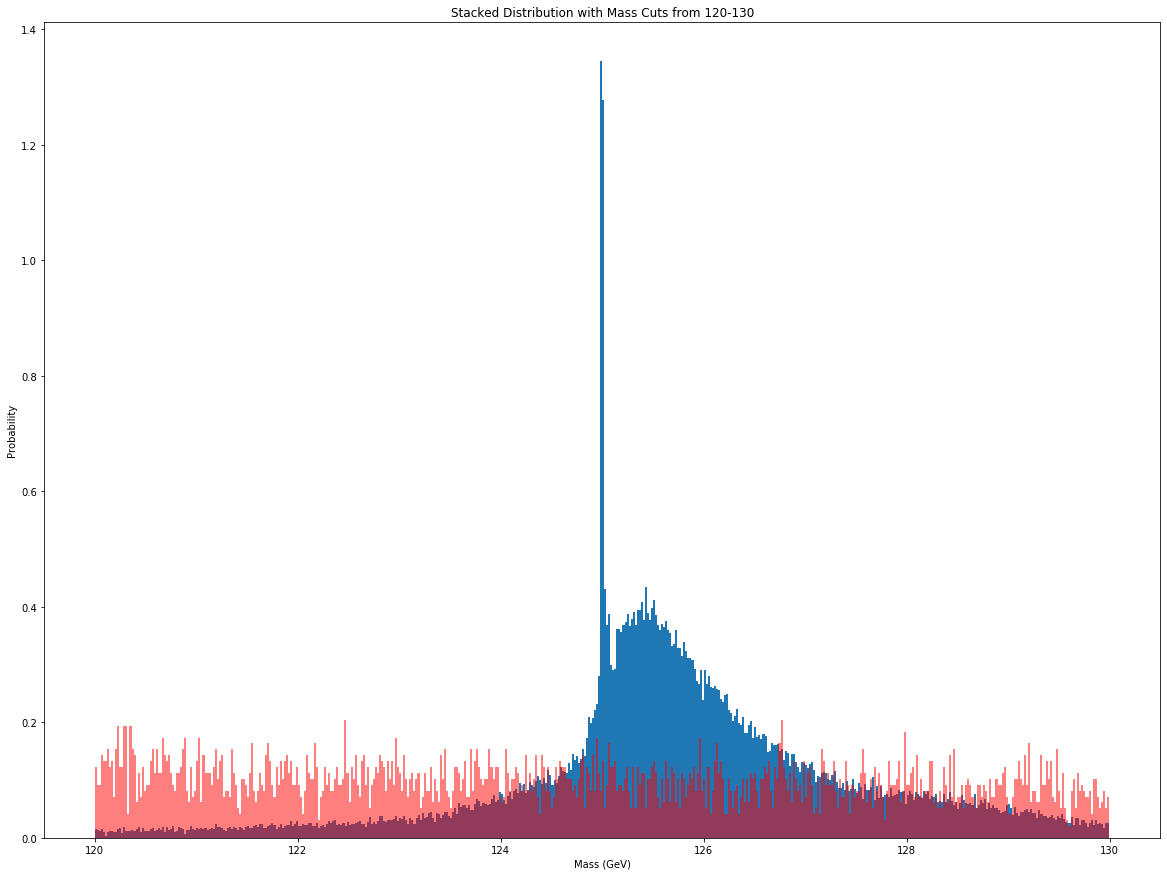

In [15]:
origArr1 = len(qcd['mass'])
origSig1 = len(qcd['mass'])

word = 'mass'
newArr1Mass = []
newSig1Mass = []
arr1Ind = []
sig1Ind = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < 130 and qcd[word][i] > 120):
        newArr1Mass.append(qcd[word][i])
        arr1Ind.append(i)
    if(higgs[word][i] < 130 and higgs[word][i] > 120):
        newSig1Mass.append(higgs[word][i])
        sig1Ind.append(i)
print('Significance of mass cut 120-130: ', (100 * (len(newSig1Mass) / origSig1)) / (20000 * (len(newArr1Mass) / origArr1))**.5)
plt.hist(newSig1Mass, 500, density=True)
plt.hist(newArr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

Significance before mass cuts of T2:  2.4225963501794676


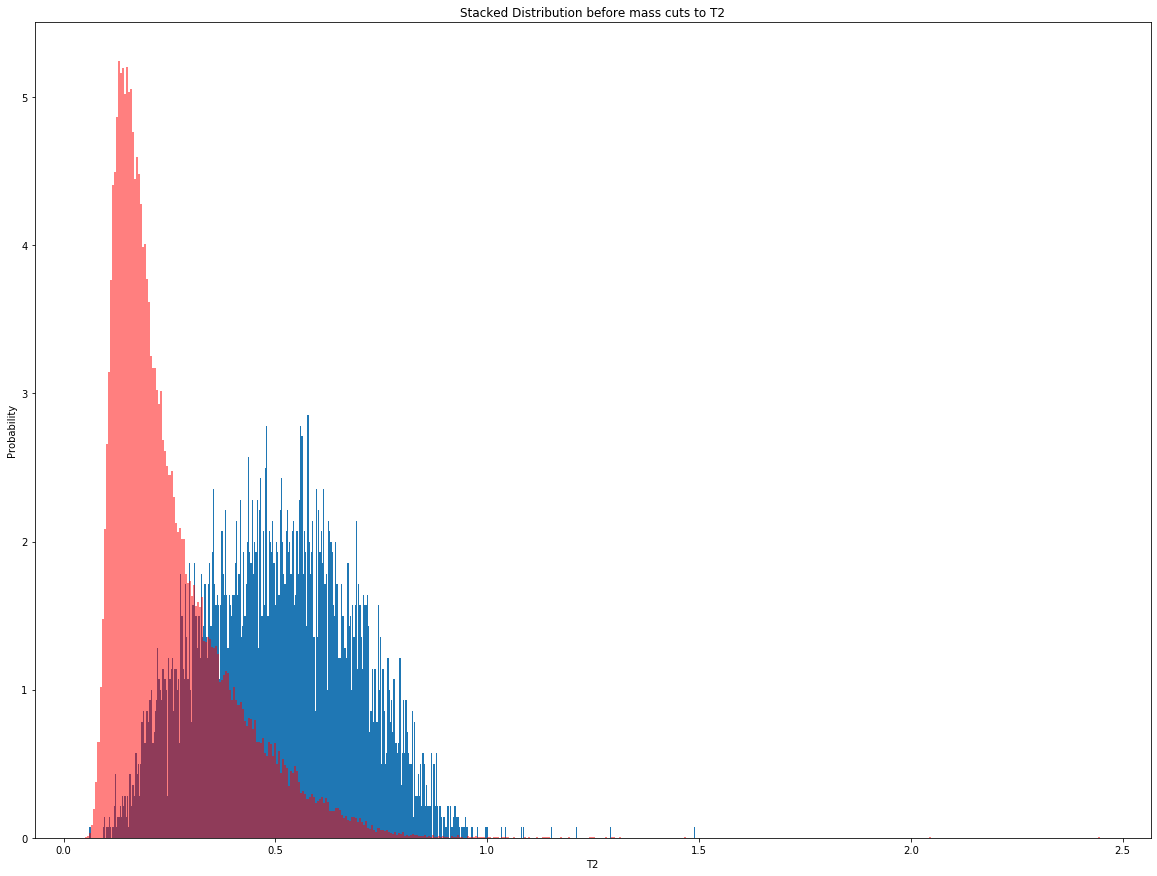

Significance with optimized cut to T2:  4.525187255710875


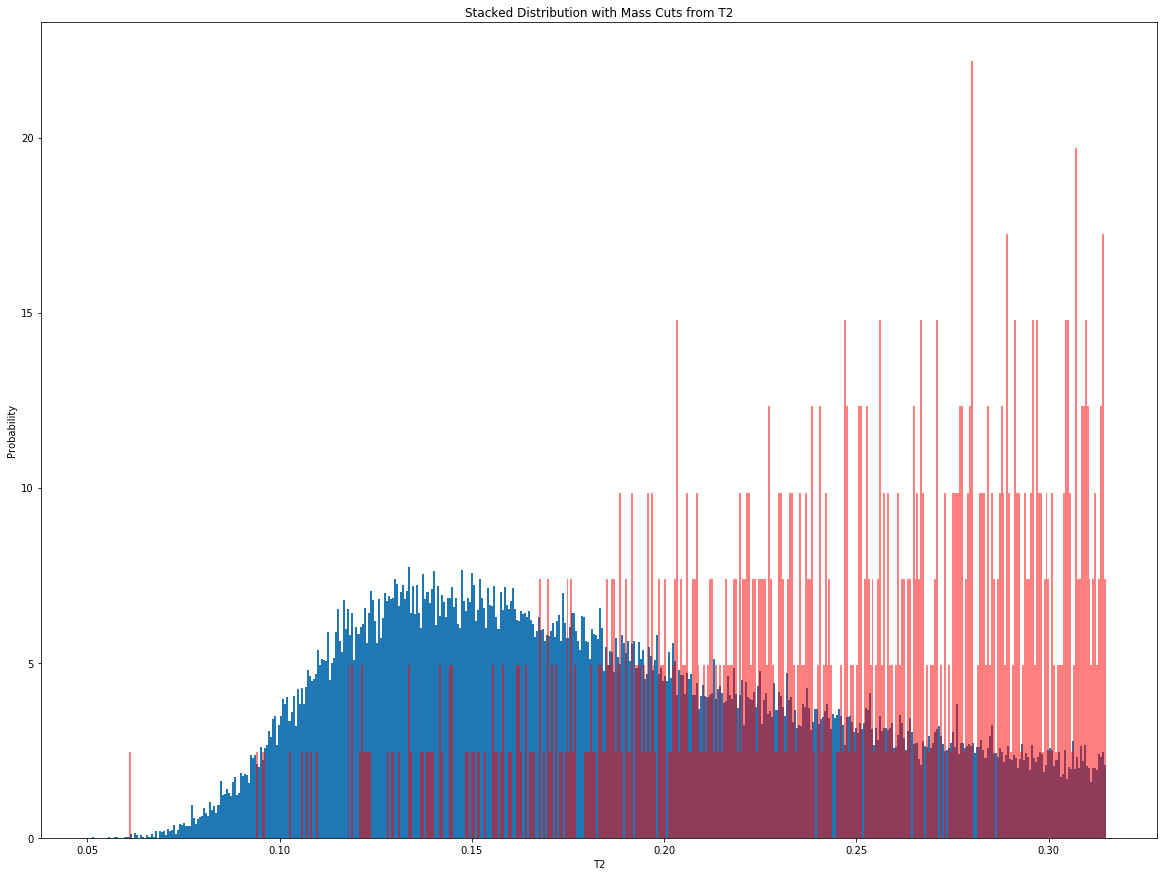

In [18]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['t2'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['t2'][i])

print('Significance before mass cuts of T2: ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution before mass cuts to T2')
plt.xlabel('T2')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .315 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .315 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
print('Significance with optimized cut to T2: ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from T2')
plt.xlabel('T2')
plt.ylabel('Probability')
plt.show()

Significance before mass cuts of T21:  2.4225963501794676


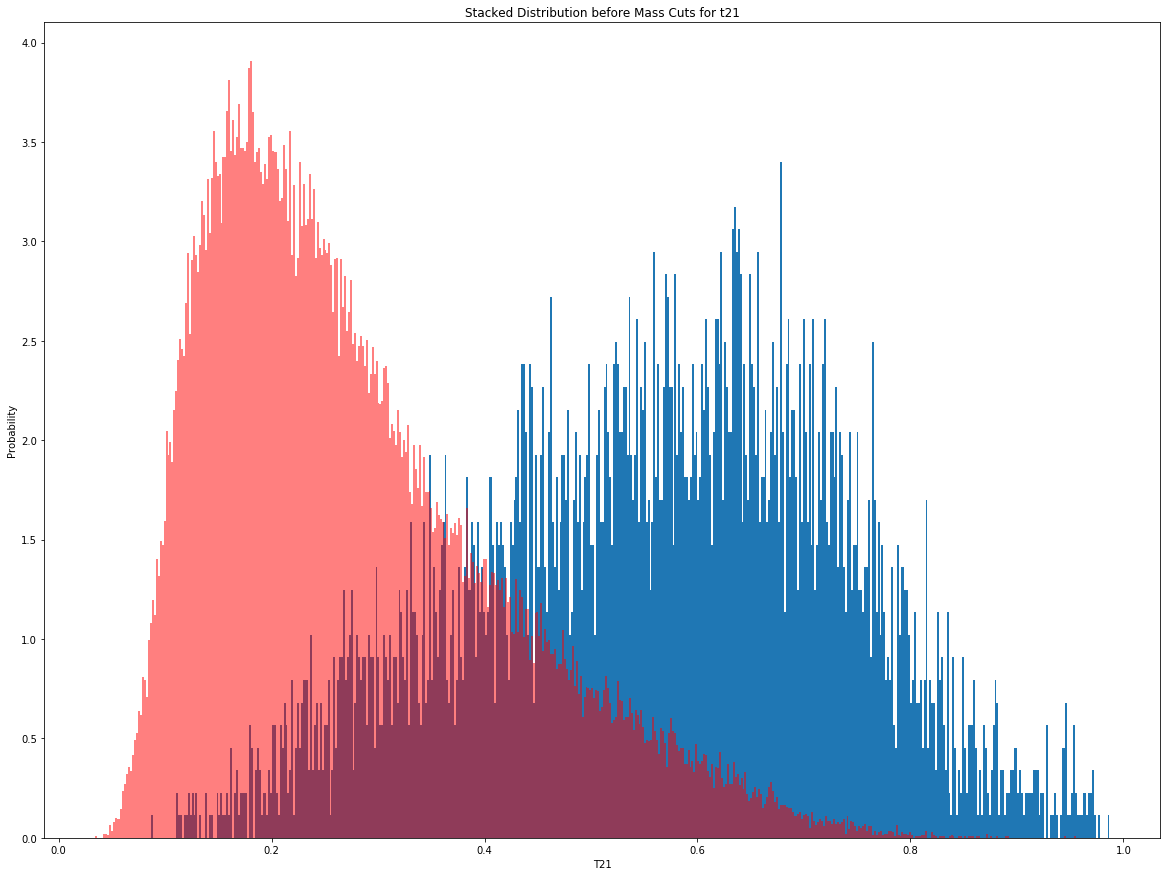

Significance of T21 with optimized cuts:  4.495255682765272


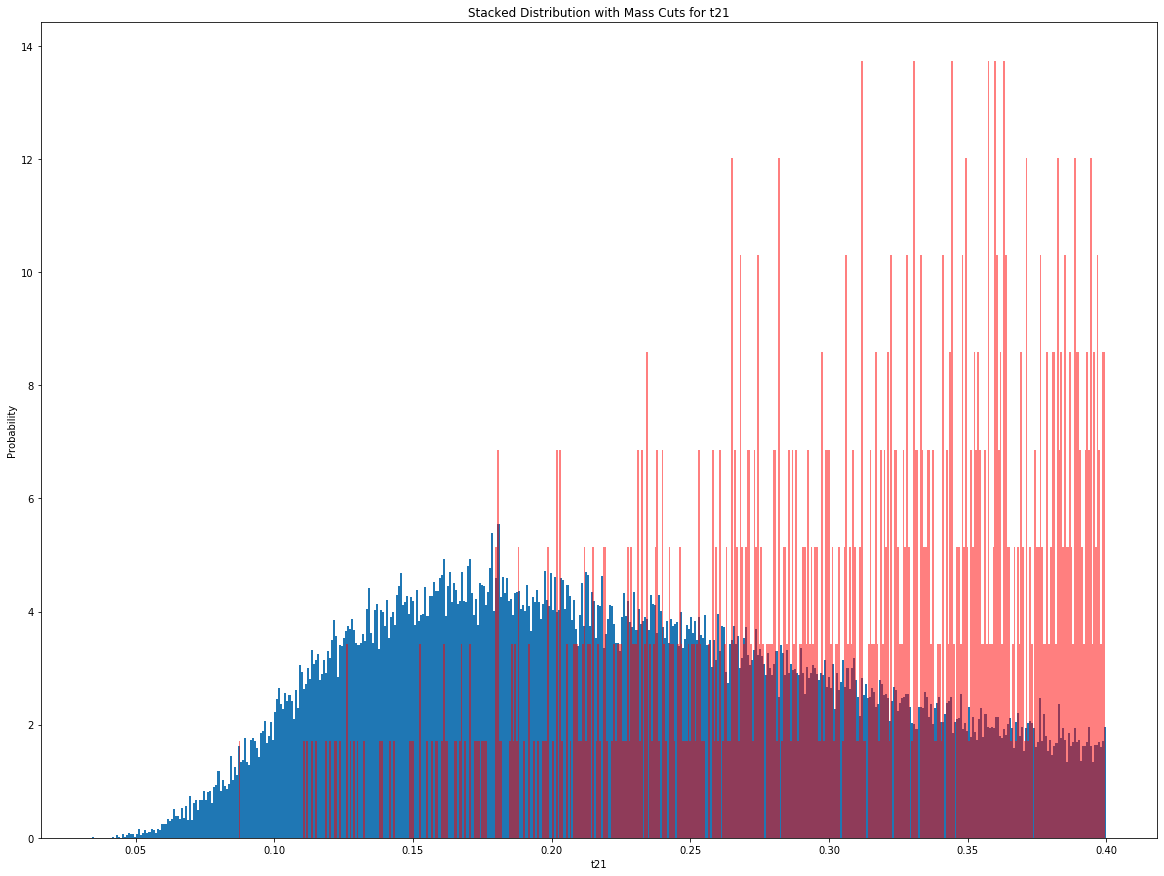

In [23]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['t21'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['t21'][i])

print('Significance before mass cuts of T21: ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution before Mass Cuts for t21')
plt.xlabel('T21')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .4 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .4 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
print('Significance of T21 with optimized cuts: ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts for t21')
plt.xlabel('t21')
plt.ylabel('Probability')
plt.show()

Significance for EE2:  2.4225963501794676


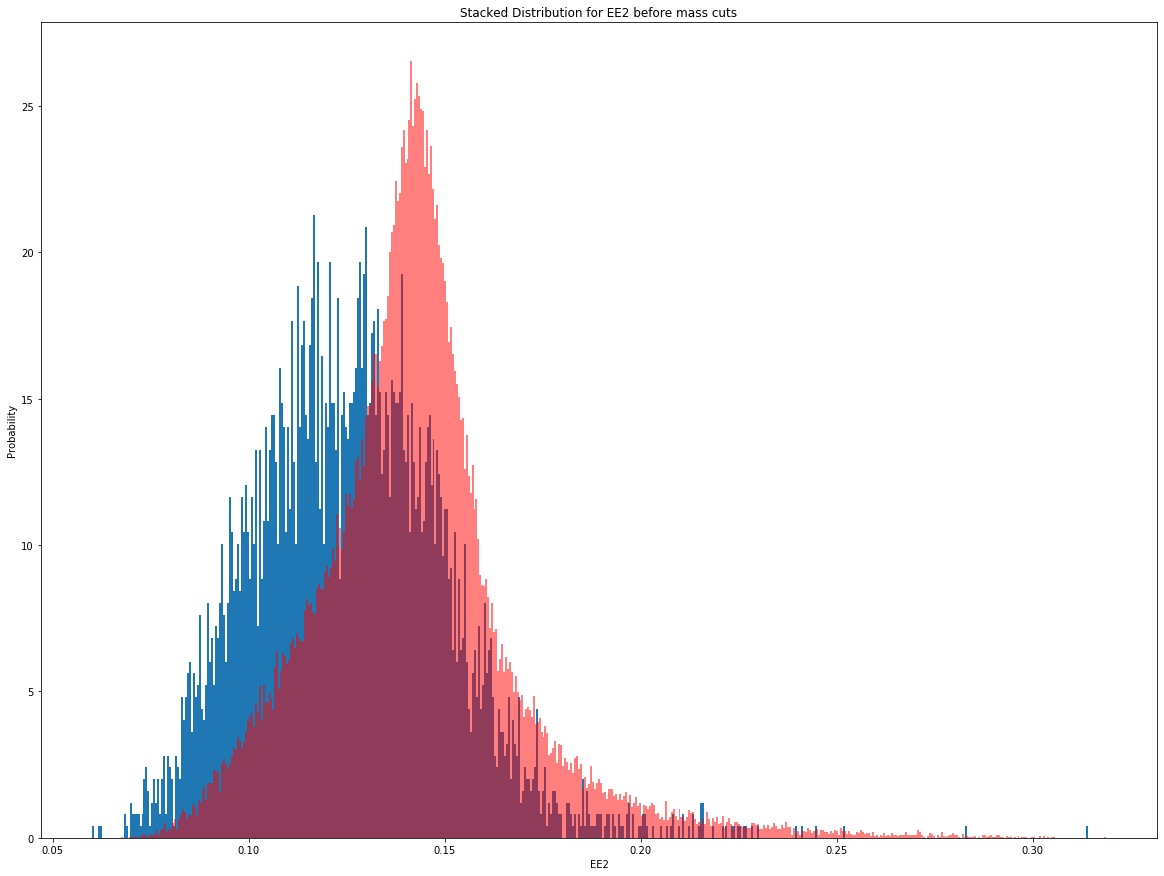

Significance for EE2 (Mass cuts .13-.3):  2.696050239804751


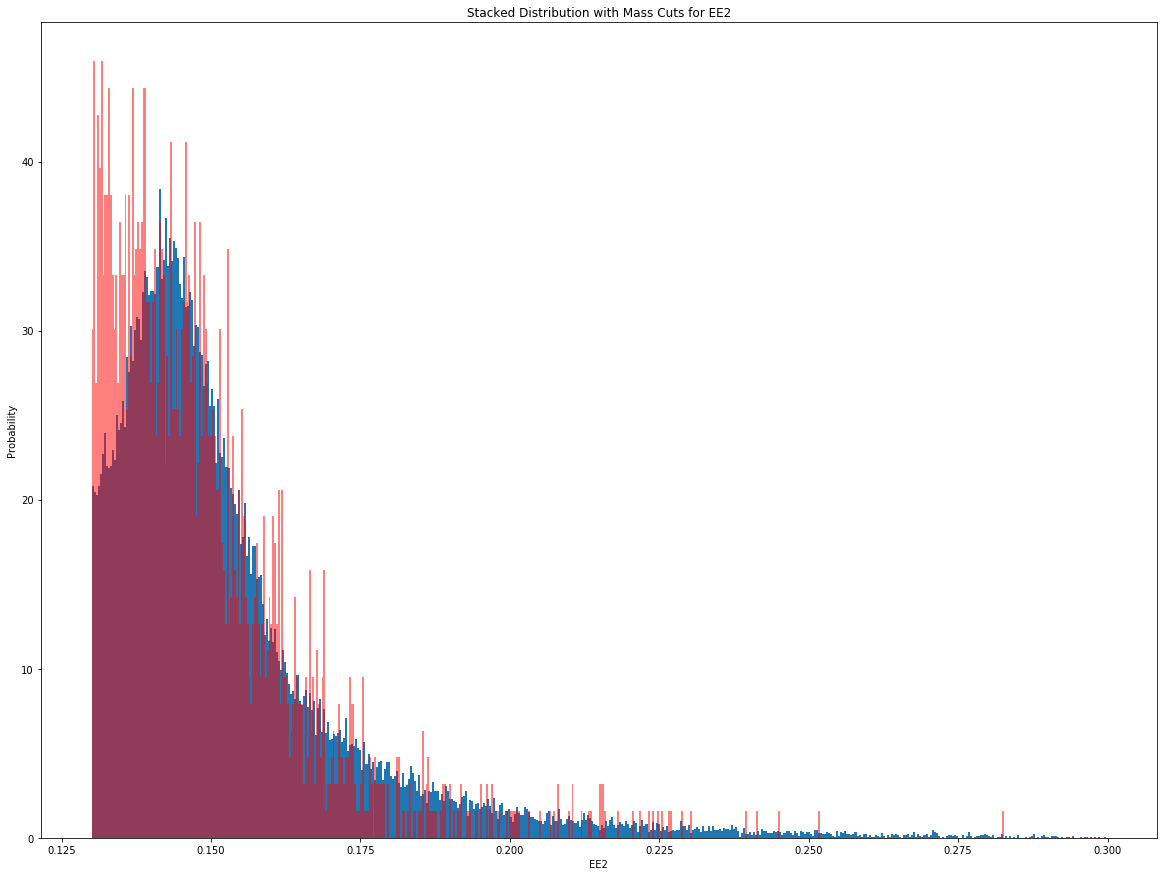

In [20]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['ee2'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['ee2'][i])

print('Significance for EE2: ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution for EE2 before mass cuts')
plt.xlabel('EE2')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .3 and arr1MassD2[i] > .13):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .3 and arr1MassSigD2[i] > .13):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
print('Significance for EE2 (Mass cuts .13-.3): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts for EE2')
plt.xlabel('EE2')
plt.ylabel('Probability')
plt.show()

Significance T2:  2.4225963501794676


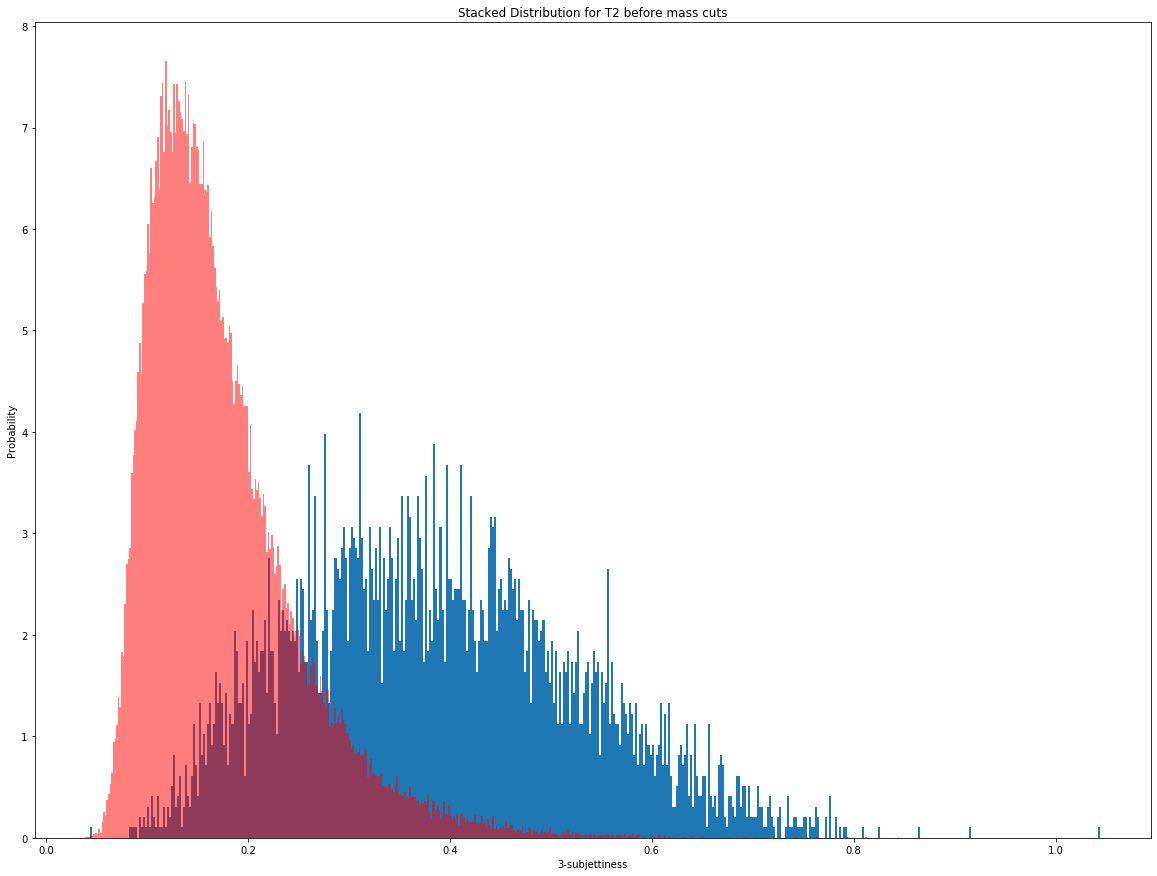

Significance T2 (Mass cuts 0-.3):  4.165058823529412


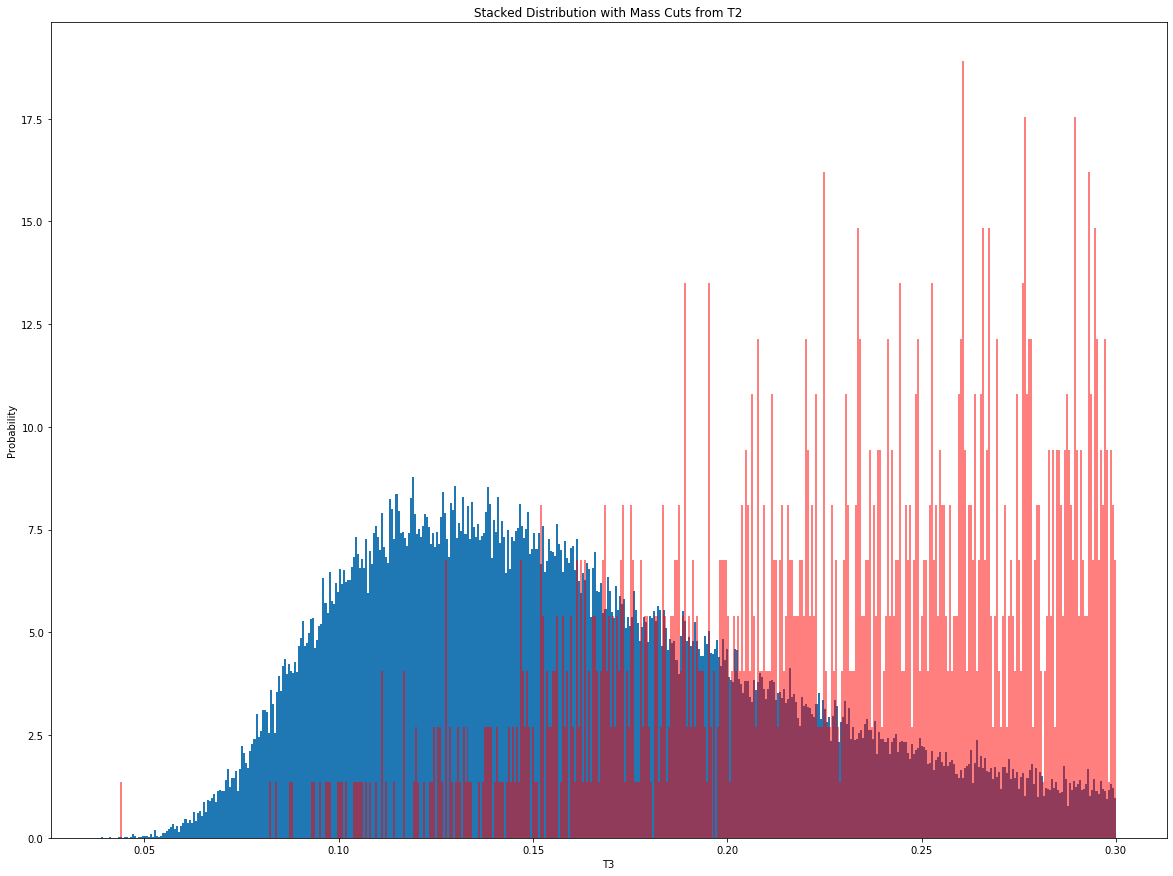

In [21]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['t3'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['t3'][i])

print('Significance T2: ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution for T2 before mass cuts')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .3 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .3 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
print('Significance T2 (Mass cuts 0-.3): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from T2')
plt.xlabel('T3')
plt.ylabel('Probability')
plt.show()

# b. Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

In this exercise I will be examining the 3-to-2-point ECF ratio (d2) and for extra information I was using the lower pt dataset. Before my event selection, Nhiggs = 100 and Nqcd = 20000 yielded a signficance of .71. Then after my initial mass cuts I reached a significance of 2.42 which was already saw a 200% increase from the previous significance. However, in order to further maximize this significance I applied these mass cuts to the other features that I had decided had a signficant enough discrimination to use to make cuts. My greatest significance came about by first taking the mass cuts of d2 and t2 and then cutting on d2 to increase significance. Then I also cut on t2 to further maximize significance to give me a significance of 4.84. My partner on the other hand had the high pt dataset and was able to maximize to about 4.94 which implies that less of the background contaminated the signal in the high pt dataset. Thus when making studies on the Higgs we should use the high pt dataset.

## 5) Bonus

# a. Plot 2-dimensional scattering plots between top two most discriminative features

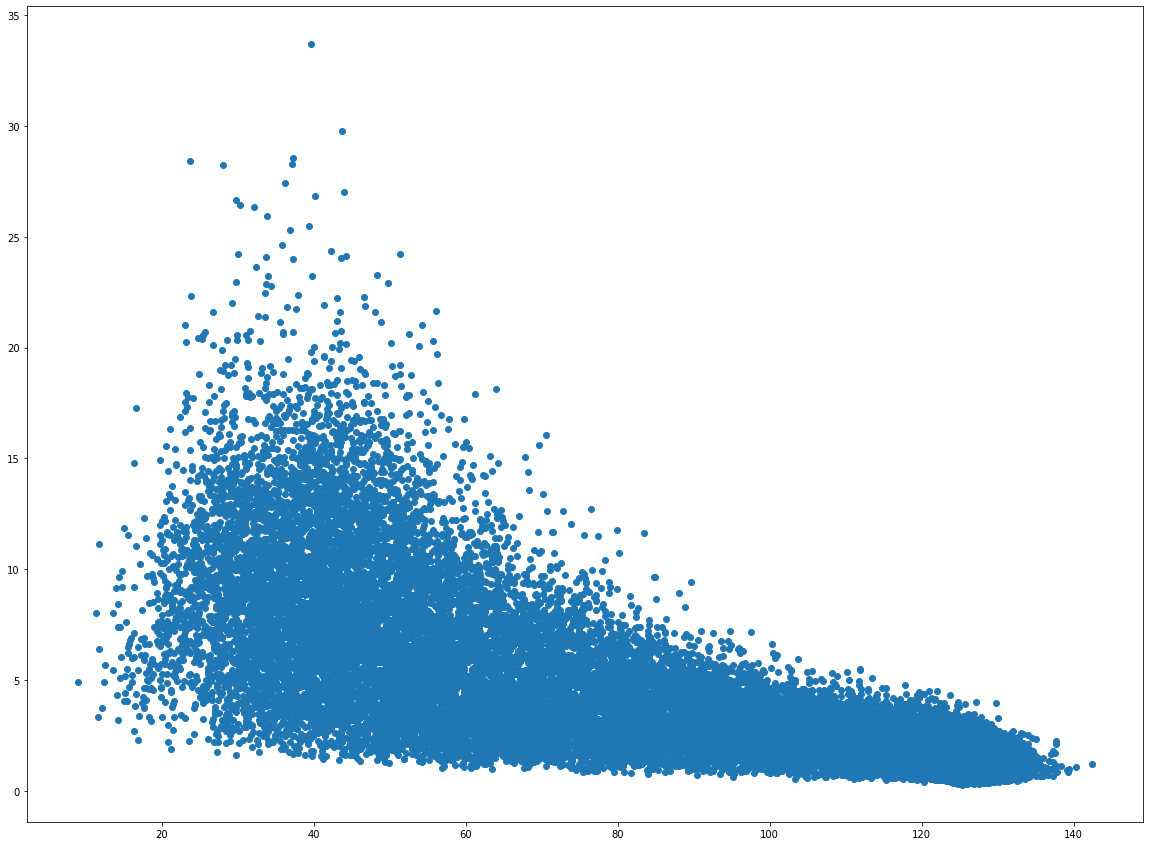

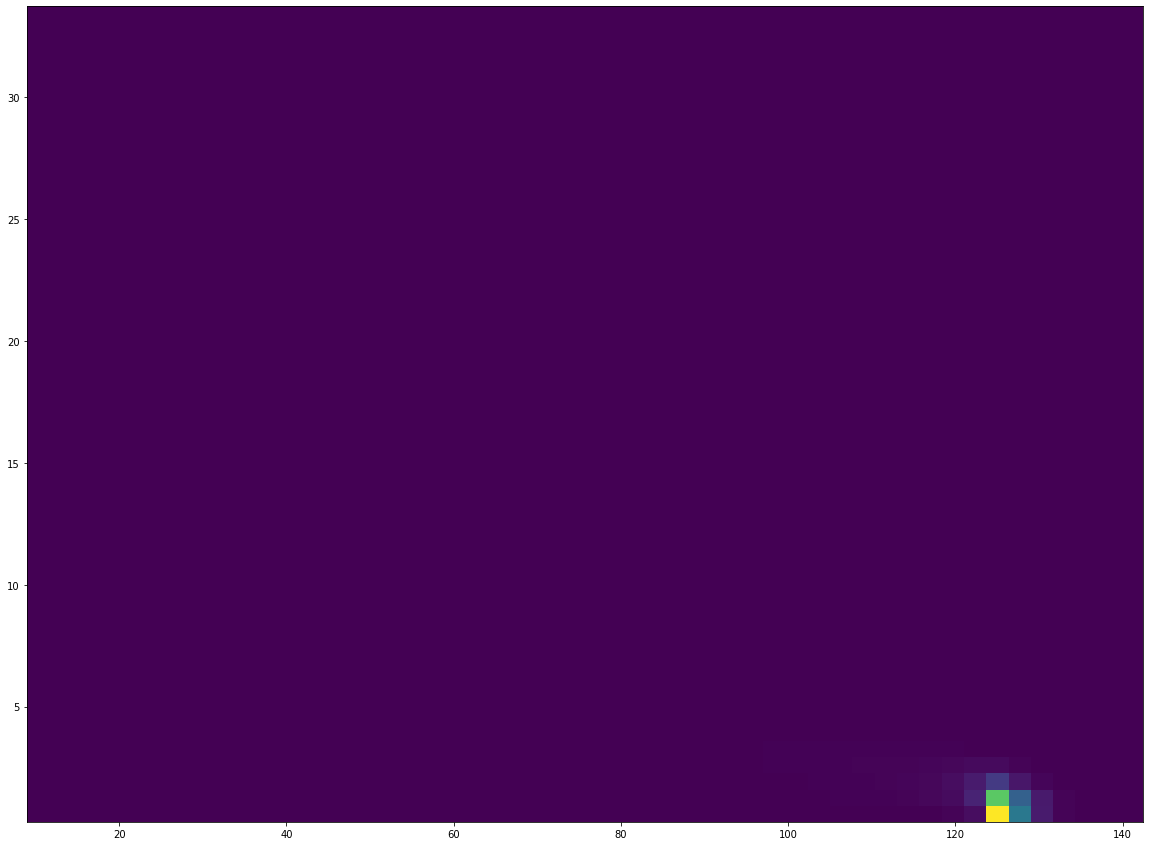

In [25]:
plt.scatter(higgs['mass'], higgs['d2'])
plt.show()
plt.hist2d(higgs['mass'], higgs['d2'], bins=(50,50), density=True)
plt.show()

You can generally see a curved fit in the first plot which would optimize your cuts because that curve is where you have the largest number of datapoint of both mass and d2 so as to increase your significance.